Abstract 
- Over the time, people have collected the sensory data on quality wine in terms of few attributes. Here, in this assignment we will be using that dataset to train machine learning models and make a fresh predictions on a new set of data, to help people access the quality of wine with the given set of attributes. This project will help the wine industry and wine testers to great extent.

Variable Description                                                  
1) Fixed Acidity - Quantity of non volatile acids in the wine.               
2) Volatile Acidity - Quantity of volatile acids like acetic acid in the wine.                                                                     
3) Citric Acid - Quantity of citric acid in wine, which gives sour taste to wine                                                             
4) Residual Sugar - Amount of sugar left in the wine after the process of fermentation                                                         
5) Chlorides - Quantity of salts in wine                               
6) Free Sulphur dioxide - Amount of free form of SO2, which prevents the oxidation of wine                                                 
7) Total Sulphur dioxide - Total Amount of SO2 - free and bonded in wine.    
8) Density - Density of wine       
9) pH - pH value of wine                          
10) Sulphates - Amount of sulphates in wine used as wine additive           
11) Alcohol - Quantity of alcohol on wine                                   
12) Quality - Output variable between (0 to 10)                                                                                                                                                                                                                                                          

In [18]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

In [19]:
# Importing all the libararies required for the assignment
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr

sns.set(rc={"figure.figsize": (16, 8)})

In [20]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [21]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

2


In [22]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:15820..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.1+12-LTS-39, mixed mode, sharing)
  Starting server from C:\Users\Karan\AppData\Local\Programs\Python\Python310\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Karan\AppData\Local\Temp\tmpxg9rh2u0
  JVM stdout: C:\Users\Karan\AppData\Local\Temp\tmpxg9rh2u0\h2o_Karan_started_from_python.out
  JVM stderr: C:\Users\Karan\AppData\Local\Temp\tmpxg9rh2u0\h2o_Karan_started_from_python.err
  Server is running at http://127.0.0.1:15820
Connecting to H2O server at http://127.0.0.1:15820 ... successful.


--------------------------  -------------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    7 days, 18 hours and 42 minutes
H2O_cluster_name:           H2O_from_python_Karan_q25r3i
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.938 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:15820
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.0 final
--------------------------  -------------------------------

Exploratory Data Analysis (EDA)

In [23]:
pandas_df = pd.read_csv(
    "https://raw.githubusercontent.com/KaranAgrawal1509/Wine-Quality-Analysis/main/WineQT.csv"
)  # Reading CSV file into Pandas DataFrame
pandas_df = pandas_df.drop("Id", axis = 1)

In [24]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1143 non-null   float64
 1   volatile_acidity      1143 non-null   float64
 2   citric_acid           1143 non-null   float64
 3   residual_sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free_sulfur_dioxide   1143 non-null   float64
 6   total_sulfur_dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [25]:
pandas_df.isnull().sum()  # Checking for any null values in the dataset, as we hav no null values - we are good to go.

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [26]:
pandas_df.shape  # Shape of the dataframe - Here, we have 1143 samples of data with 12 predictors and 1 result

(1143, 12)

In [27]:
pandas_df.head()  # Sample of how our data looks

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [28]:
columns = list(pandas_df.columns)
print(columns)  # Name of all predictors and result

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [29]:
pandas_df.describe()  # Statistical description of our dataset

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043  
std       0.156664     0.170399     1.082196     0.805824  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.205000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

This table shows summary statistics for a dataset with 1143 observations and 12 variables. 

The variables are: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and quality.

The "count" row shows the number of observations for each variable, while the "mean" row shows the average value of each variable. 

The "std" row shows the standard deviation of each variable, which is a measure of how much the values vary from the mean.

The "min" and "max" rows show the smallest and largest values observed for each variable. 

The "25%", "50%", and "75%" rows show the values at the 25th, 50th, and 75th percentiles of the distribution, respectively. 

These percentiles divide the observations into quarters, with the 25th percentile being the value below which 25% of the observations fall, and so on.

<AxesSubplot: >

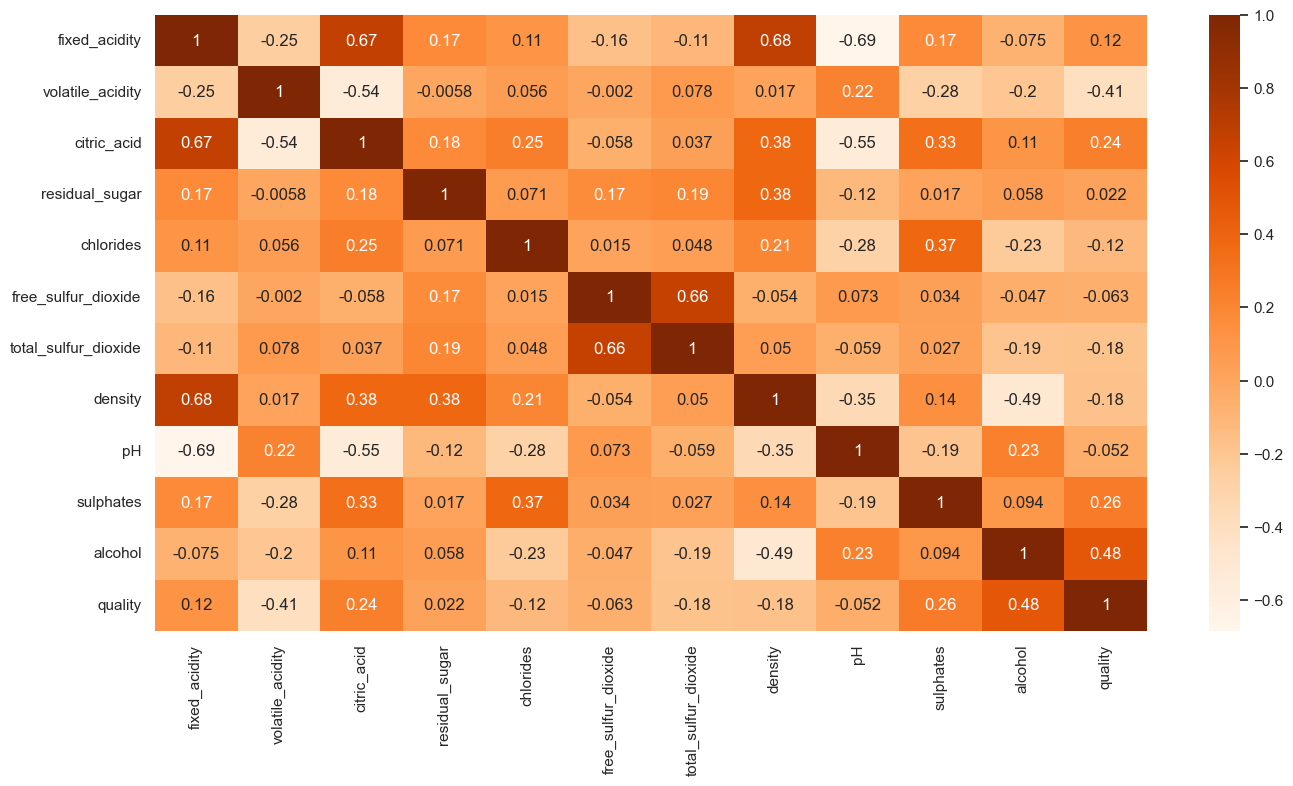

In [30]:
sns.heatmap(
    pandas_df.corr(), annot=True, cmap="Oranges"
)  # Heatmap showing correlation between the attributes.

# Correlation Analysis

Above is a graphical representation of the correlation between different features in the dataset. The heatmap displays a matrix of colors that represent the strength of the correlation between pairs of variables.

We can calculate the correlation between pairs of variables using a correlation coefficient, such as the *Pearson correlation coefficient*. This coefficient measures the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation.

The above heatmap displays the correlation coefficients as colors in a matrix, with each variable plotted both on the x and y axis. The color of each cell in the matrix indicates the strength of the correlation between the corresponding pair of variables, with a color scale ranging from low (e.g. light maroon) to high (e.g. dark maroon).

A correlation heatmap can help you identify the relationships between pairs of variables in a dataset. You can use it to spot patterns and trends, and to identify variables that are strongly correlated (either positively or negatively). This information can be useful for exploratory data analysis and for identifying potential predictors in statistical models.

From the Above Matrix we can conclude a few things
- Total Sulphur Dioxide and Free Sulphur Dioxide is highly correlated
- pH and fixed_acidity is highly correlated

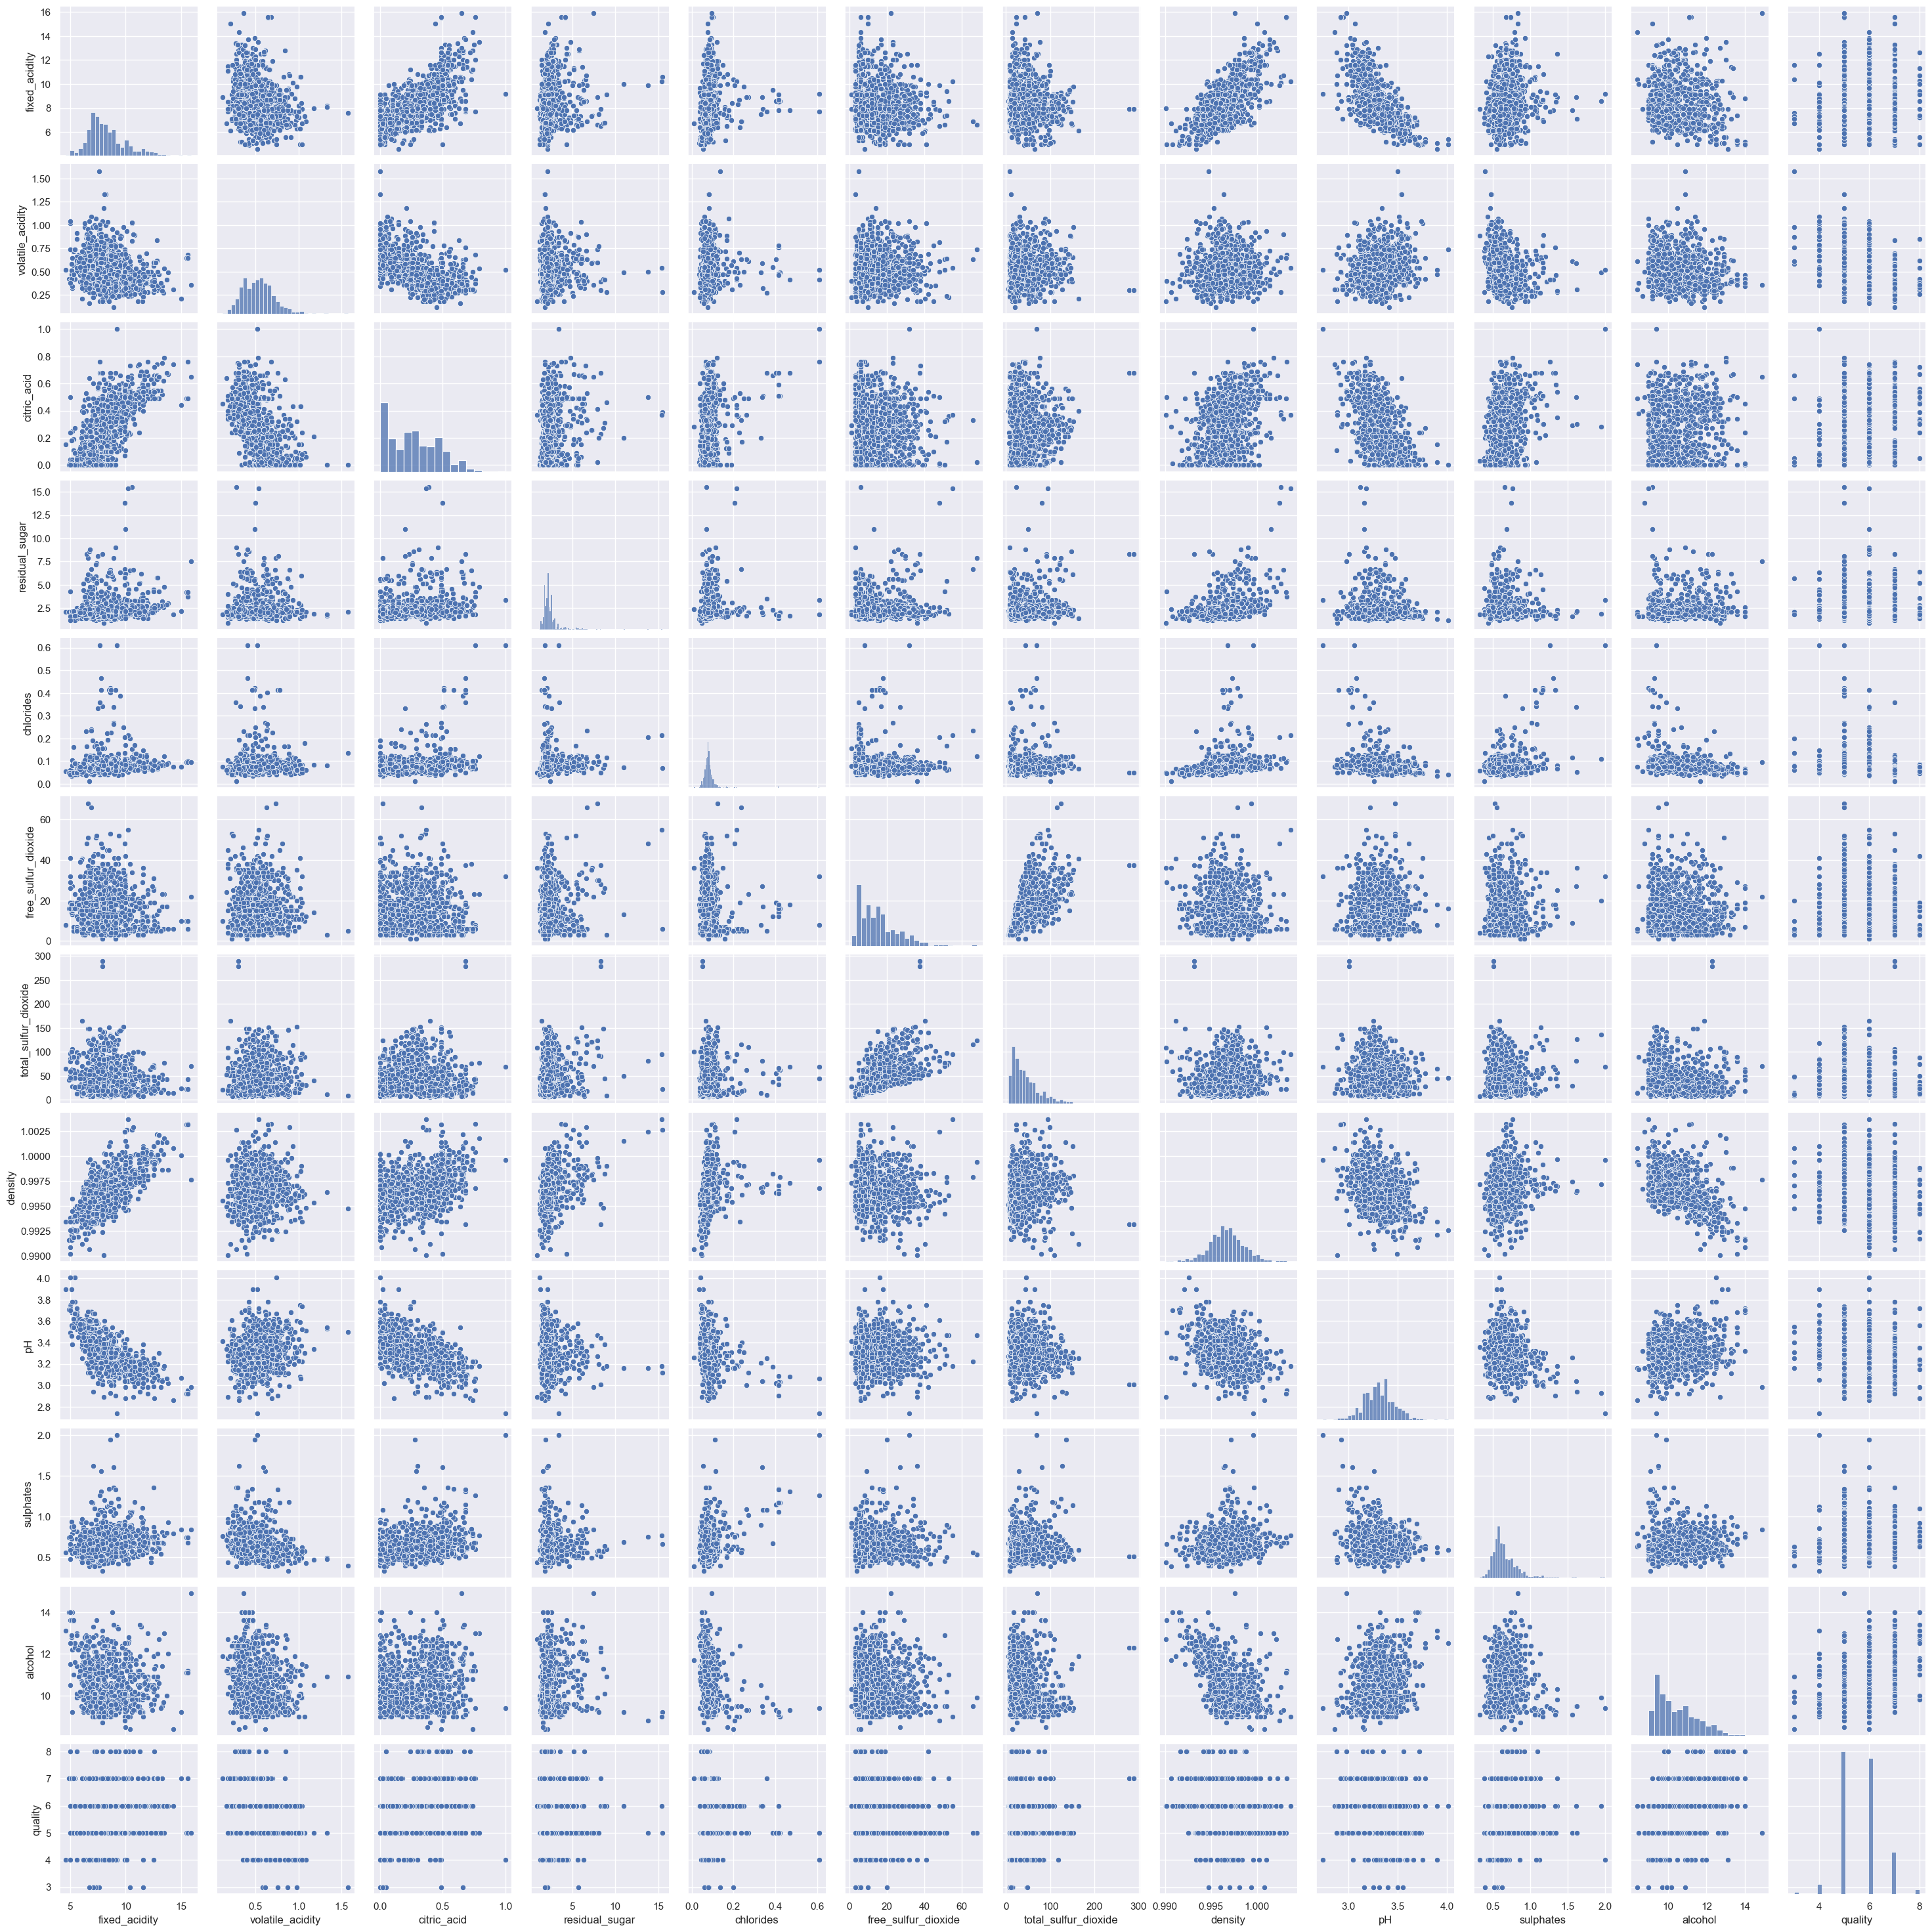

In [31]:
sns.pairplot(
    pandas_df
)  # All attributes are plotted against each other to see the pattern of distribution

# Interpreting PairPlot
- A pair plot is a graphical representation of pairwise relationships between variables in a dataset. It displays scatter plots for each pair of variables
- Relationship between variables: The scatter plots show the relationship between pairs of variables. If two variables are highly correlated, the scatter plot will show a strong linear relationship between them. If there is no correlation between the variables, the scatter plot will show a random distribution of points. The pair plot can help identify variables that have a strong positive or negative correlation.

- Distribution of variables: The histograms show the distribution of each variable. If a variable has a normal distribution, the histogram will be bell-shaped. If a variable is skewed, the histogram will be asymmetric. The pair plot can help identify variables that have non-normal distributions or outliers.

- Outliers: The scatter plots can reveal any outliers that may exist in the dataset. Outliers are data points that are far from the other data points and can have a significant impact on statistical models.

- Patterns and trends: By examining the scatter plots, you can identify patterns and trends in the data. For example, you may see that the relationship between two variables changes over time, or that there is a nonlinear relationship between two variables.

- Potential predictors: By examining the scatter plots, you can identify variables that may be potential predictors for a statistical model. Variables that have a strong correlation with the target variable may be good predictors for the model.


In [32]:
df = h2o.H2OFrame(
    pandas_df
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [33]:
df.types  # Datatype of all attributes, here the result ("quality") is int hence it can be solved using the regression. If this problem was supposed to solved using the classification method - this attributes datatype must be converted into enum

{'fixed_acidity': 'real',
 'volatile_acidity': 'real',
 'citric_acid': 'real',
 'residual_sugar': 'real',
 'chlorides': 'real',
 'free_sulfur_dioxide': 'real',
 'total_sulfur_dioxide': 'real',
 'density': 'real',
 'pH': 'real',
 'sulphates': 'real',
 'alcohol': 'real',
 'quality': 'int'}

In [34]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [35]:
print(df_train.shape)
print(df_test.shape)

(928, 12)
(215, 12)


In [36]:
df_train.head()

fixed_acidity    volatile_acidity    citric_acid    residual_sugar    chlorides    free_sulfur_dioxide    total_sulfur_dioxide    density    pH    sulphates    alcohol    quality
---------------  ------------------  -------------  ----------------  -----------  ---------------------  ----------------------  ---------  ----  -----------  ---------  ---------
            7.4               0.7             0                  1.9        0.076                     11                      34     0.9978  3.51         0.56        9.4          5
            7.8               0.88            0                  2.6        0.098                     25                      67     0.9968  3.2          0.68        9.8          5
            7.8               0.76            0.04               2.3        0.092                     15                      54     0.997   3.26         0.65        9.8          5
           11.2               0.28            0.56               1.9        0.075                     17                      60     0.998   3.16         0.58        9.8          6
            7.4               0.7             0                  1.9        0.076                     11                      34     0.9978  3.51         0.56        9.4          5
            7.4               0.66            0                  1.8        0.075                     13                      40     0.9978  3.51         0.56        9.4          5
            7.8               0.58            0.02               2          0.073                      9                      18     0.9968  3.36         0.57        9.5          7
            5.6               0.615           0                  1.6        0.089                     16                      59     0.9943  3.58         0.52        9.9          5
            7.8               0.61            0.29               1.6        0.114                      9                      29     0.9974  3.26         1.56        9.1          5
            8.5               0.28            0.56               1.8        0.092                     35                     103     0.9969  3.3          0.75       10.5          7
[10 rows x 12 columns]

In [37]:
X = df.columns
print(X)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [38]:
# Set target and predictor variables
y = "quality"
X.remove(y)  # Removing the result frm our predictors data
print(X)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [39]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [40]:
aml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models

AutoML progress: |
13:11:17.40: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_6_AutoML_1_20230216_131116


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       13/44
# GBM base models (used / total)           10/25
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  2/16
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.04351297581959765
RMSE: 0.2085976409732326
MAE: 0.1571932149997773
RMSLE: 0.032835359139727315
Mean Residual Deviance: 0.04351297581959765
R^2: 0.9331222407209065
Null degrees of freedom: 927
Residual degrees of freedom: 914
Null deviance: 603.7887931034496
Residual deviance: 40.38004156058662
AIC: -245.44805450936258

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.3379875662080809
RMSE: 0.5813669806654665
MAE: 0.42980565282115646
RMSLE: 0.08965160347726027
Mean Residual Deviance: 0.3379875662080809
R^2: 0.4805261955444048
Null degrees of freedom: 927
Residual degrees of freedom: 913
Null deviance: 605.7659318419454
Residual deviance: 313.6524614410991
AIC: 1658.9054713645462

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.432397   0.0302905   0.407141      0.402838      0.462319      0.466675      0.42301
mean_residual_deviance  0.337519   0.0471953   0.308481      0.302189      0.400054      0.376554      0.300318
mse                     0.337519   0.0471953   0.308481      0.302189      0.400054      0.376554      0.300318
null_deviance           121.153    13.8039     118.703       106.714       142.588       125.121       112.639
r2                      0.478286   0.0326564   0.508288      0.463985      0.491655      0.427976      0.499529
residual_deviance       62.6239    8.62506     58.303        55.6028       72.4097       71.5452       55.2585
rmse                    0.579856   0.0401011   0.555411      0.549717      0.632498      0.61364       0.548013
rmsle                   0.0892782  0.00795371  0.0864867     0.0860699     0.10117       0.0925036     0.0801605

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

We can see above that the best model, is slighly overfitting on the dataset as there is a significant difference between the metrics on training and validation dataset
# Understanding the Parameters
- Mean Squared Error (MSE): The MSE measures the average squared difference between the predicted and actual values. It is calculated by taking the average of the squared differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.

- Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE, and it is a commonly used metric for evaluating the accuracy of regression models. The RMSE is a measure of how well the model is able to predict the actual values.

- Mean Absolute Error (MAE): The MAE measures the average absolute difference between the predicted and actual values. It is calculated by taking the average of the absolute differences between the predicted and actual values. It is a common metric for evaluating the accuracy of regression models.

- Root Mean Squared Logarithmic Error (RMSLE): The RMSLE is a variation of the RMSE that is used for regression models where the target variable has a wide range of values. It is calculated by taking the square root of the average of the squared differences between the logarithm of the predicted and actual values.

- Mean Residual Deviance: The Mean Residual Deviance is a measure of the goodness of fit for a regression model. It measures the average difference between the predicted and actual values, normalized by the degrees of freedom of the model.

- R-squared (R^2): The R-squared is a measure of how well the model fits the data. It is the proportion of the variance in the dependent variable that is explained by the independent variables. A value of 1 means that the model explains all the variability in the data, while a value of 0 means that the model explains none of the variability.

- Null Degrees of Freedom: The Null Degrees of Freedom is the number of observations in the dataset minus 1. It represents the number of observations in the dataset that are free to vary, given the number of parameters in the model.

- Residual Degrees of Freedom: The Residual Degrees of Freedom is the number of observations in the dataset minus the number of parameters in the model. It represents the number of observations in the dataset that are free to vary after taking into account the number of parameters in the model.

- Null Deviance: The Null Deviance is the deviance of the null model, which is the model with no independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.

- Residual Deviance: The Residual Deviance is the deviance of the model after accounting for the independent variables. It represents the variance in the dependent variable that is not explained by the independent variables.

- Akaike Information Criterion (AIC): The AIC is a measure of the quality of a model that takes into account the complexity of the model. It is calculated as the negative log-likelihood of the model plus twice the number of parameters in the model. The AIC can be used to compare the quality of different models, with lower values indicating better quality.

In [41]:
print(
    aml.leaderboard
)  # Leaderboard showing the performance of different models on the dataset.

model_id                                                     rmse       mse       mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_6_AutoML_1_20230216_131116     0.581367  0.337988  0.429806  0.0896516                  0.337988
StackedEnsemble_BestOfFamily_6_AutoML_1_20230216_131116  0.584747  0.341929  0.432862  0.0900864                  0.341929
StackedEnsemble_AllModels_4_AutoML_1_20230216_131116     0.585537  0.342854  0.432091  0.0901472                  0.342854
StackedEnsemble_Best1000_1_AutoML_1_20230216_131116      0.585668  0.343007  0.434196  0.0900965                  0.343007
StackedEnsemble_AllModels_3_AutoML_1_20230216_131116     0.586132  0.343551  0.431872  0.0902288                  0.343551
StackedEnsemble_BestOfFamily_4_AutoML_1_20230216_131116  0.586669  0.34418   0.432211  0.0902868                  0.34418
StackedEnsemble_BestOfFamily_7_AutoML_1_20230216_131116  0.587149  0.344744  0.437179  0.0903271                  0.344744
StackedEnsemble_A

The models listed in the leaderboard are ranked based on their rmse score, where a lower score indicates better performance. The top row in the leaderboard represents the best-performing model with the lowest rmse score. The evaluation metrics can be used to compare the performance of different models and help in selecting the best model for the particular use case.

In this leaderboard, the best performing model is 
- StackedEnsemble_AllModels_6_AutoML_1_20230214_153130 with an rmse score of 0.567758. 
- The second-best model is StackedEnsemble_BestOfFamily_7_AutoML_1_20230214_153130 with an rmse score of 0.572525. 

The models are then listed in descending order based on their rmse scores.

In [42]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'StackedEnsemble_AllModels_6_AutoML_1_20230216_131116': 0,
 'StackedEnsemble_BestOfFamily_6_AutoML_1_20230216_131116': 1,
 'StackedEnsemble_AllModels_4_AutoML_1_20230216_131116': 2,
 'StackedEnsemble_Best1000_1_AutoML_1_20230216_131116': 3,
 'StackedEnsemble_AllModels_3_AutoML_1_20230216_131116': 4,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20230216_131116': 5,
 'StackedEnsemble_BestOfFamily_7_AutoML_1_20230216_131116': 6,
 'StackedEnsemble_AllModels_1_AutoML_1_20230216_131116': 7,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20230216_131116': 8,
 'StackedEnsemble_AllModels_2_AutoML_1_20230216_131116': 9,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20230216_131116': 10,
 'DRF_1_AutoML_1_20230216_131116': 11,
 'GLM_1_AutoML_1_20230216_131116': 49}

In [43]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

11


In [44]:
best_model.algo

'drf'

In [45]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

C:\Users\Karan\AppData\Local\Temp\ipykernel_20768\1077238210.py:8: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


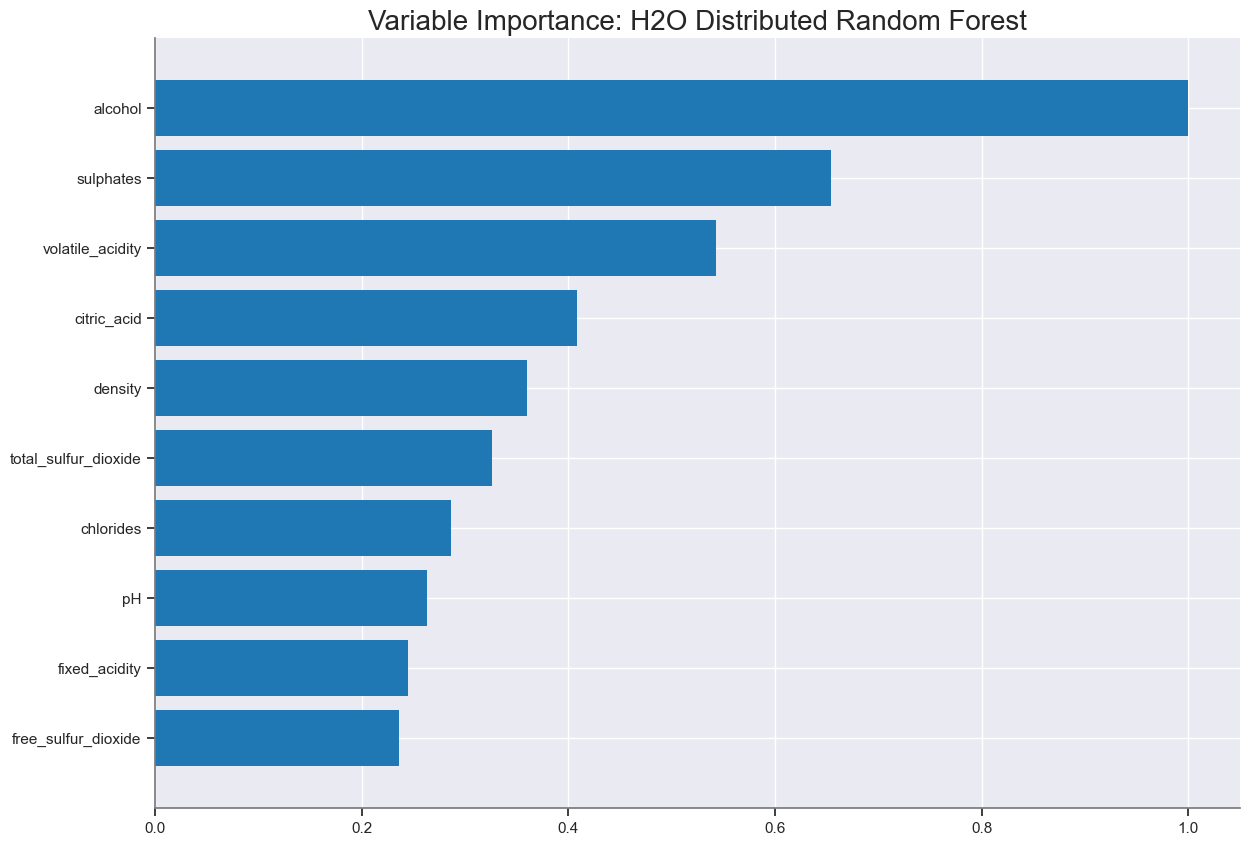

<Figure size 1600x800 with 0 Axes>

In [46]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

The above graph is a variable Importance Graph on the H20's Distributed Random Forest Model
- We can Interpret that Alcohol is the Most Important Variable among all with importance of 1.0 (Think as if this Importance is scaled to 100%)
- Sulphate is 0.55 (Think as if it is 55% Important than Alcohol was)

And So On..

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Karan\AppData\Local\Temp\ipykernel_20768\537718518.py:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


49
glm


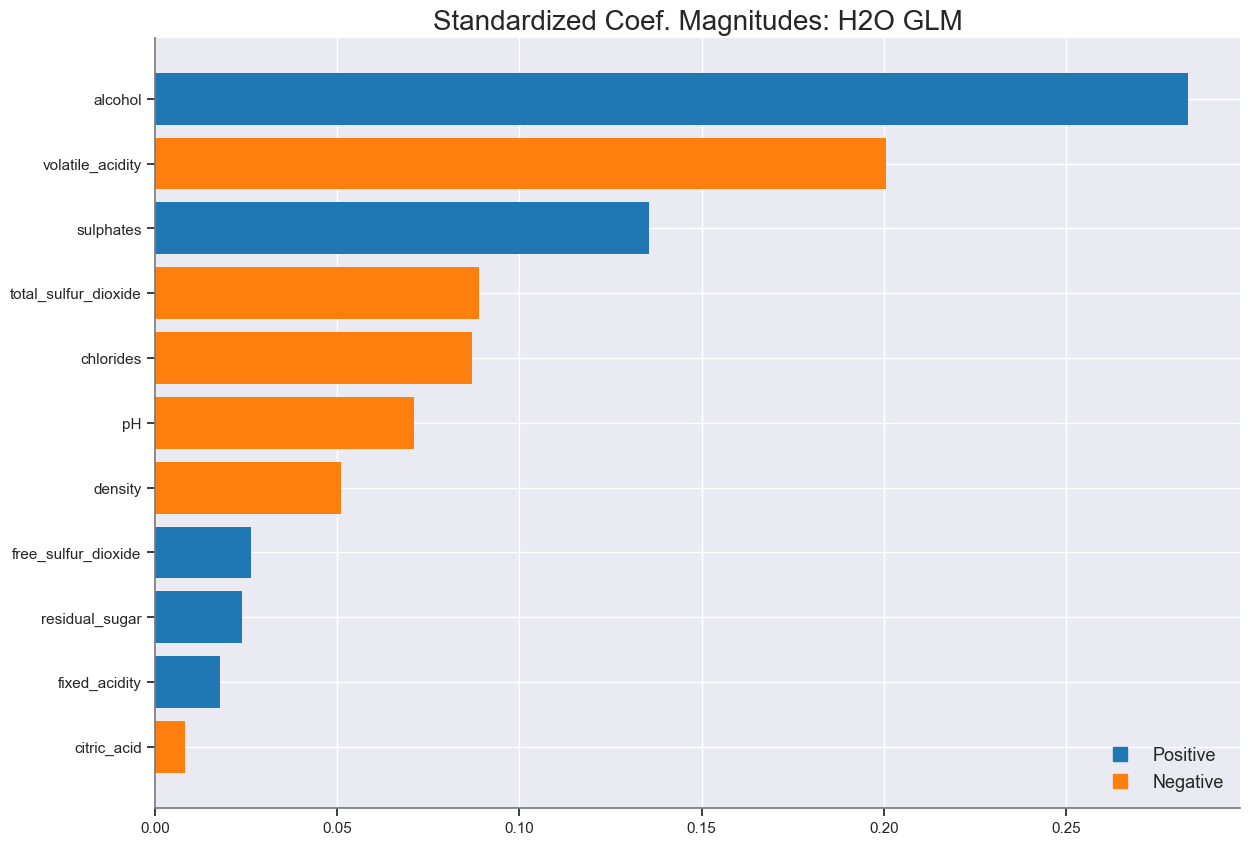

In [47]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

Standardized coefficient magnitudes (sometimes referred to as standardized coefficients or beta coefficients) are a measure of the importance of each input variable in a predictive model, after standardizing all variables to have a mean of zero and a standard deviation of one. The values of standardized coefficient magnitudes can range from negative infinity to positive infinity, but they are typically expressed as a percentage. 

The values on standardized coefficient magnitudes represent the relative importance of each input variable in the model, after taking into account the scale of the variable. A higher magnitude value indicates that the variable has a stronger impact on the outcome variable, while a lower value indicates a weaker impact.

In [48]:
print(best_model.rmse(train=True))

0.6136605143671858


In [49]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [50]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.37993269581677624,
 'rmse': 0.6163868069781964,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [51]:
predictions = best_model.predict(df_test)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [52]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

      predict
0    5.000000
1    4.941176
2    5.323529
3    5.588235
4    5.500000
..        ...
210  6.294118
211  6.235294
212  5.676471
213  6.323529
214  5.823529

[215 rows x 1 columns]


In [53]:
y_test = h2o.as_list(df_test[y])  # Real Answers
y_test

quality
0          5
1          7
2          5
3          6
4          6
..       ...
210        6
211        6
212        5
213        6
214        6

[215 rows x 1 columns]

In [54]:
print(X)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']


# Regularization
In this Section, we will be using the GLM model to check if regularization is helping us to improve the accuracy and reduce overfitting. 
- Ridge and Lasso are regularization techniques used in linear regression to prevent overfitting and improve the model's generalization ability.

- Ridge regularization adds a penalty term to the least-squares objective function of the linear regression model. This penalty term is proportional to the square of the magnitude of the coefficients of the model, which shrinks the coefficients towards zero. The strength of the penalty is controlled by a hyperparameter called the regularization parameter, which needs to be tuned to achieve the best performance. Ridge regularization is particularly useful when there are many input variables that are correlated with each other, as it can help to reduce the variance of the model by reducing the effect of these correlated variables.

- Lasso regularization is similar to Ridge regularization, but instead of adding a penalty term proportional to the square of the coefficients, it adds a penalty term proportional to the absolute value of the coefficients. This penalty term can set some coefficients to exactly zero, which makes Lasso regularization a useful method for feature selection. By setting some coefficients to zero, Lasso can effectively remove irrelevant variables from the model, which can lead to a simpler and more interpretable model.

- The main difference between Ridge and Lasso regularization is the type of penalty function used. Ridge uses L2 regularization, while Lasso uses L1 regularization. L2 regularization tends to distribute the penalty evenly across all coefficients, while L1 regularization tends to concentrate the penalty on a smaller subset of the most important coefficients. Which method to use depends on the specific problem and the properties of the input variables.

In [55]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

wine_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5
)  # Elastic Net Regularization
wine_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5
)  # RIDGE Regularization
wine_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5
)  # LASSO Regularization
wine_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

This code is creating two generalized linear regression models using the H2O machine learning platform with different regularization methods: Ridge and Lasso.

- The first model, "wine_glm_regularization_ridge," is using Ridge regularization. The "family" argument is set to "gaussian," which means that the response variable is continuous and the model is using a normal (Gaussian) error distribution. The "alpha" argument is set to 0, which means that the model is using Ridge regularization. The "nfolds" argument is set to 5, which means that the model is using 5-fold cross-validation to evaluate the performance of the model.
- The second model, "wine_glm_regularization_lasso," is using Lasso regularization. The "family" and "nfolds" arguments are the same as in the Ridge model, but the "alpha" argument is set to 1, which means that the model is using Lasso regularization.
- This code creates a generalized linear regression model using H2O with the option of performing lambda search for L1 and L2 regularization.

In [56]:
wine_glm.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1676571038484_32


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              11                            11                             1                       py_2_sid_bf8e

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.40334483336285726
RMSE: 0.6350943499692445
MAE: 0.4940284137519982
RMSLE: 0.0968043458248014
Mean Residual Deviance: 0.40334483336285726
R^2: 0.380074606160166
Null degrees of freedom: 927
Residual degrees of freedom: 916
Null deviance: 603.7887931034496
Residual deviance: 374.30400536073154
AIC: 1816.9598666555487

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.4186122024366611
RMSE: 0.647002474830399
MAE: 0.5022211123613458
RMSLE: 0.09852498038489207
Mean Residual Deviance: 0.4186122024366611
R^2: 0.3566092509526496
Null degrees of freedom: 927
Residual degrees of freedom: 916
Null deviance: 605.3161354613186
Residual deviance: 388.47212386122146
AIC: 1851.4379417760388

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.5019     0.0321555   0.55597       0.481648      0.479662      0.507081      0.485141
mean_residual_deviance  0.41815    0.0455668   0.488676      0.403418      0.397912      0.432565      0.368179
mse                     0.41815    0.0455668   0.488676      0.403418      0.397912      0.432565      0.368179
null_deviance           121.063    12.4891     140.402       123.869       109.093       111.127       120.824
r2                      0.352449   0.0608941   0.34183       0.378934      0.348284      0.263136      0.430063
residual_deviance       77.6944    9.65021     92.3598       76.6494       70.8284       80.8896       67.745
rmse                    0.645897   0.0347795   0.699054      0.635152      0.630803      0.657696      0.606778
rmsle                   0.0982711  0.00668134  0.109008      0.094753      0.0938659     0.100575      0.0931535

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  -----------------
    2023-02-16 13:15:01  0.000 sec   0             603.7887931034496          0.6506344753269931
    2023-02-16 13:15:01  0.005 sec   1                                                            0.6350943499692445  0.40334483336285726  0.4940284137519982  0.380074606160166

Variable Importances: 
variable              relative_importance    scaled_importance    percentage
--------------------  ---------------------  -------------------  ------------
alcohol               0.319385               1                    0.302168
volatile_acidity      0.214947               0.673004             0.20336
sulphates             0.136893               0.428614             0.129514
pH                    0.100857               0.315786             0.0954206
total_sulfur_dioxide  0.0937289              0.293467             0.0886764
chlorides             0.0897251              0.280931             0.0848884
free_sulfur_dioxide   0.0323858              0.101401             0.03064
citric_acid           0.0279791              0.0876032            0.0264709
residual_sugar        0.0141624              0.04434

# Ridge Regularization

In [57]:
wine_glm_regularization_ridge.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1676571038484_33


GLM Model: summary
    family    link      regularization               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 3.969E-4 )  11                            11                             1                       py_2_sid_bf8e

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.40334491948134227
RMSE: 0.6350944177689978
MAE: 0.49404215442930094
RMSLE: 0.09680448453955173
Mean Residual Deviance: 0.40334491948134227
R^2: 0.3800744737993885
Null degrees of freedom: 927
Residual degrees of freedom: 916
Null deviance: 603.7887931034496
Residual deviance: 374.30408527868565
AIC: 1816.960064793566

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.41691901427861283
RMSE: 0.6456926624010938
MAE: 0.5006436339201007
RMSLE: 0.09835823065608404
Mean Residual Deviance: 0.41691901427861283
R^2: 0.3592116156017059
Null degrees of freedom: 927
Residual degrees of freedom: 916
Null deviance: 605.081451056135
Residual deviance: 386.9008452505527
AIC: 1847.6767878415742

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.501211   0.0280342   0.457777      0.509437      0.507234      0.496734      0.534874
mean_residual_deviance  0.4182     0.054735    0.338657      0.434608      0.433165      0.397547      0.487024
mse                     0.4182     0.054735    0.338657      0.434608      0.433165      0.397547      0.487024
null_deviance           121.016    14.7533     115.564       97.8958       134.251       126.08        131.29
r2                      0.354093   0.069356    0.451889      0.258304      0.353148      0.369373      0.337749
residual_deviance       77.3802    9.55045     63.3288       72.5796       85.7667       79.5094       85.7163
rmse                    0.645546   0.0428837   0.581942      0.659248      0.658153      0.630513      0.697871
rmsle                   0.0983063  0.00851041  0.0887069     0.0989039     0.0973844     0.0946919     0.111845

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  -------------------  ------------------
    2023-02-16 13:15:01  0.000 sec   0             603.7887931034496          0.6506344753269931
    2023-02-16 13:15:01  0.003 sec   1                                                            0.6350944177689978  0.40334491948134227  0.49404215442930094  0.3800744737993885

Variable Importances: 
variable              relative_importance    scaled_importance    percentage
--------------------  ---------------------  -------------------  ------------
alcohol               0.318944               1                    0.302054
volatile_acidity      0.214808               0.673498             0.203433
sulphates             0.136916               0.429278             0.129665
pH                    0.100468               0.315002             0.0951479
total_sulfur_dioxide  0.0936783              0.293714             0.0887176
chlorides             0.0896953              0.281226             0.0849456
free_sulfur_dioxide   0.0323225              0.101342             0.0306109
citric_acid           0.027803               0.0871721            0.0263307
density  

The regularization appears to have helped in reducing the cross-validation metrics. 
- The mean squared error (Improved by 0.468%), 
- root mean squared error (Improved by 0.234%), 
- mean absolute error(Improved by 0.298%), 
and root mean squared logarithmic error are all lower in the model with regularization compared to the model without regularization. Additionally, the residual deviance and AIC are also lower in the model with regularization. The R-squared value is slightly higher in the model with regularization, which means that the regularization helped the model to better generalize to new data.

# Lasso Regularization

In [58]:
wine_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1676571038484_34


GLM Model: summary
    family    link      regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Lasso (lambda = 3.969E-4 )  11                            11                             1                       py_2_sid_bf8e

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.4033492660041767
RMSE: 0.635097839709896
MAE: 0.4941184325434741
RMSLE: 0.09680413784756488
Mean Residual Deviance: 0.4033492660041767
R^2: 0.38006779336206264
Null degrees of freedom: 927
Residual degrees of freedom: 916
Null deviance: 603.7887931034496
Residual deviance: 374.308118851876
AIC: 1816.9700650471016

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 0.4224841392610884
RMSE: 0.6499877993171014
MAE: 0.5034898317699591
RMSLE: 0.09902583921959072
Mean Residual Deviance: 0.4224841392610884
R^2: 0.35065823395115825
Null degrees of freedom: 927
Residual degrees of freedom: 916
Null deviance: 604.782830148379
Residual deviance: 392.06528123429007
AIC: 1859.9819873910712

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.501774   0.0440467   0.568723      0.465108      0.483627      0.523373      0.468039
mean_residual_deviance  0.419392   0.0734155   0.521214      0.378312      0.388465      0.468137      0.340833
mse                     0.419392   0.0734155   0.521214      0.378312      0.388465      0.468137      0.340833
null_deviance           120.957    17.5446     146.229       126.978       111.187       120.9         99.4885
r2                      0.353055   0.0821213   0.280916      0.444006      0.388154      0.252565      0.399631
residual_deviance       78.4131    18.0887     103.722       70.3661       67.9813       90.3505       59.6458
rmse                    0.645661   0.0560551   0.721951      0.615071      0.623269      0.684206      0.583809
rmsle                   0.0984988  0.00730963  0.106233      0.0966766     0.0954685     0.105342      0.088774

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse      training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  -----------------  -------------------  ------------------  -------------------
    2023-02-16 13:15:02  0.000 sec   0             603.7887931034496          0.6506344753269931
    2023-02-16 13:15:02  0.003 sec   1                                                            0.635097839709896  0.4033492660041767   0.4941184325434741  0.38006779336206264

Variable Importances: 
variable              relative_importance    scaled_importance    percentage
--------------------  ---------------------  -------------------  ------------
alcohol               0.318123               1                    0.304056
volatile_acidity      0.214521               0.674334             0.205035
sulphates             0.13643                0.428859             0.130397
pH                    0.0980027              0.308065             0.093669
total_sulfur_dioxide  0.0922629              0.290023             0.088183
chlorides             0.0888308              0.279234             0.0849027
free_sulfur_dioxide   0.0312098              0.0981058            0.0298297
citric_acid           0.0272779              0.0857463            0.0260717
density              

# Which Regularization Method Helps ?

- The Lasso regularization appears to have increased the MSE, RMSE, MAE, and RMSLE values compared to the non-regularized and Ridge regularized models, indicating worse performance. The R-squared value also decreased, indicating a worse fit to the data.

- So based on these metrics, it seems that Lasso did not help in this case and performed worse than Ridge. However, it's always a good practice to try multiple regularization techniques and compare their performance using different metrics, as the optimal regularization method can depend on the specific dataset and modeling task.

- Here, we can observe that after applying the ridge regularization, there is a slight improvement in the evaluation metrics on the cross validation data, hence it can be concluded that Ridge regularization helps us avoid the overfitting of model and improvements of metrics on the validation dataset.

In [59]:
lambda_search = wine_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [60]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1676571038484_35


GLM Model: summary
    family    link      regularization                                 lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.003951 )  nlambda = 100, lambda.max = 0.7939, lambda.min = 0.003951, lambda.1se = -1.0  11                            10                             58                      py_2_sid_bf8e

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.4034573997562093
RMSE: 0.6351829655746518
MAE: 0.49463184425507023
RMSLE: 0.0968156793994646
Mean Residual Deviance: 0.4034573997562093
R^2: 0.37990159597146445
Null degrees of freedom: 927
Residual degrees of freedom: 917
Null deviance: 603.7887931034496
Residual deviance: 374.40846697376224
AIC: 1815.2188188731316

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train       alpha    iterations    training_rmse       training_deviance    training_mae         training_r2
---  -------------------  ----------  -----------  --------  ------------  -------------------  -------  ------------  ------------------  -------------------  -------------------  -------------------
     2023-02-16 13:15:02  0.000 sec   1            .79E0     1             0.6506344753269928   0.5
     2023-02-16 13:15:02  0.002 sec   2            .72E0     2             0.6307314533251993   0.5
     2023-02-16 13:15:02  0.002 sec   3            .66E0     2             0.6129339359706082   0.5
     2023-02-16 13:15:02  0.003 sec   4            .6E0      3             0.5890406768281216   0.5
     2023-02-16 13:15:02  0.003 sec   5            .55E0     3             0.5664116993013232   0.5
     2023-02-16 13:15:02  0.003 sec   6            .5E0      3             0.5466336472314566   0.5
     2023-02-16 13:15:02  0.004 sec   7            .45E0     3             0.5294126832371477   0.5
     2023-02-16 13:15:02  0.004 sec   8            .41E0     3             0.5144714992355712   0.5
     2023-02-16 13:15:02  0.004 sec   9            .38E0     3             0.5015515319500561   0.5
     2023-02-16 13:15:02  0.006 sec   10           .34E0     3             0.490414253980044    0.5
---  ---                  ---         ---          ---       ---           ---                  ---      ---           ---                 ---                  ---                  ---
     2023-02-16 13:15:02  0.032 sec   49           .91E-2    11            0.40384519879857855  0.5
     2023-02-16 13:15:02  0.032 sec   50           .83E-2    11            0.40376465600235373  0.5
     2023-02-16 13:15:02  0.032 sec   51           .76E-2    11            0.4036976155201728   0.5
     2023-02-16 13:15:02  0.032 sec   52           .69E-2    11            0.4036428420677347   0.5
     2023-02-16 13:15:02  0.033 sec   53           .63E-2    11            0.40359620461239154  0.5
     2023-02-16 13:15:02  0.033 sec   54           .57E-2    11            0.40355741897542036  0.5
     2023-02-16 13:15:02  0.033 sec   55           .52E-2    11            0.4035251408741589   0.5
     2023-02-16 13:15:02  0.033 sec   56           .48E-2    11            0.4034982926086741   0.5
     2023-02-16 13:15:02  0.034 sec   57           .43E-2    11            0.4034759650074052   0.5
     2023-02-16 13:15:02  0.034 sec   58           .4E-2     11            0.4034573997562073   0.5      58            0.6351829655746518  0.4034573997562093   0.49463184425507023  0.37990159597146445
[58 rows x 

Above  parameters are from a lambda search, which means that the model was trained on a range of different values of the regularization parameter lambda to find the value that minimized the selected loss function. Based on the reported metrics, it seems that the optimal value of lambda resulted in a slightly improved model compared to the non-regularized model. The MSE, RMSE, and MAE all decreased slightly, indicating that the model is making slightly more accurate predictions on the training data. The R^2 value, which measures how well the model fits the data, decreased slightly, which may indicate that the model is not overfitting the training data as much. Overall, the lambda search seems to have resulted in a slightly improved model.

- MSE improved from 0.4234393816333662 to 0.42185125944877285, or by 0.375%
- RMSE improved from 0.6507222000465069 to 0.6493051832461667, or by 0.218%
- MAE improved from 0.5049750807378458 to 0.5035142349852977, or by 0.290%
- RMSLE improved from 0.09927527847388463 to 0.09893003268921823, or by 0.348%
- R-squared improved from 0.358097238638058 to 0.3603008092769123, or by 0.616%


Here we can observe that regularization helps a bit in reducing the overfitting of our GLM model. 

In [61]:
coeff_table = wine_glm._model_json["output"]["coefficients_table"]

In [62]:
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each attributes.

names  coefficients  std_error   z_value       p_value  \
0              Intercept     12.343874  27.414962  0.450260  6.526292e-01   
1          fixed_acidity     -0.007429   0.033810 -0.219738  8.261245e-01   
2       volatile_acidity     -1.206501   0.158094 -7.631542  5.814056e-14   
3            citric_acid     -0.141276   0.195634 -0.722142  4.703914e-01   
4         residual_sugar      0.010170   0.019573  0.519607  6.034631e-01   
5              chlorides     -1.810607   0.538933 -3.359617  8.127295e-04   
6    free_sulfur_dioxide      0.003159   0.002816  1.121805  2.622394e-01   
7   total_sulfur_dioxide     -0.002802   0.000911 -3.077571  2.149044e-03   
8                density     -7.230618  27.984026 -0.258384  7.961688e-01   
9                     pH     -0.644915   0.250641 -2.573065  1.023658e-02   
10             sulphates      0.798982   0.148701  5.373089  9.820777e-08   
11               alcohol      0.293836   0.034734  8.459552  1.052418e-16   

    standardized_coefficients  
0                    5.640086  
1                   -0.013081  
2                   -0.214947  
3                   -0.027979  
4                    0.014162  
5                   -0.089725  
6                    0.032386  
7                   -0.093729  
8                   -0.013833  
9                   -0.100857  
10                   0.136893  
11                   0.319385

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                     rmse       mse       mae      rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-------------------------------------------------------  --------  --------  --------  ---------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_6_AutoML_1_20230216_131116     0.602667  0.363208  0.430968  0.0927658                  0.363208                 486                   0.081111  StackedEnsemble
StackedEnsemble_BestOfFamily_6_AutoML_1_20230216_131116  0.604539  0.365467  0.432947  0.0929614                  0.365467                 242                   0.022991  StackedEnsemble
GBM_grid_1_AutoML_1_20230216_131116_model_2              0.607     0.368449  0.461269  0.0936297                  0.368449                 113                   0.010432  GBM
StackedEnsemble_AllModels_4_AutoML_1_20230216_131116     0.610513  0.372726  0.435444  0.0937043                  0.372726                 135                   0.055073  StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20230216_131116     0.610515  0.372729  0.435444  0.0937046                  0.372729                 177                   0.073928  StackedEnsemble
StackedEnsemble_Best1000_1_AutoML_1_20230216_131116      0.611016  0.37334   0.436972  0.0937194                  0.37334                  145                   0.071252  StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_1_20230216_131116  0.612     0.374544  0.435677  0.0939124                  0.374544                 140                   0.028464  StackedEnsemble
GBM_grid_1_AutoML_1_20230216_131116_model_10             0.612232  0.374828  0.459686  0.0945932                  0.374828                 193                   0.013569  GBM
GBM_grid_1_AutoML_1_20230216_131116_model_8              0.612698  0.375398  0.425504  0.0943692                  0.375398                 361                   0.014041  GBM
StackedEnsemble_BestOfFamily_7_AutoML_1_20230216_131116  0.613899  0.376872  0.440523  0.0941148                  0.376872                 128                   0.021989  StackedEnsemble
GBM_4_AutoML_1_20230216_131116                           0.613995  0.37699   0.456761  0.0944988                  0.37699                  109                   0.008576  GBM
StackedEnsemble_BestOfFamily_2_AutoML_1_20230216_131116  0.614208  0.377251  0.440328  0.0941666                  0.377251                 129                   0.020937  StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230216_131116     0.614315  0.377383  0.440317  0.0941933                  0.377383                 145                   0.026041  StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20230216_131116  0.614581  0.37771   0.440629  0.0942692                  0.37771                  149                   0.025534  StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20230216_131116     0.614639  0.377781  0.440615  0.0942846                  0.377781                 146                   0.030817  StackedEnsemble
GBM_grid_1_AutoML_1_20230216_131116_model_12             0.614747  0.377914  0.452161  0.0946055                  0.377914                 151                   0.011522  GBM
XRT_1_AutoML_1_20230216_131116                           0.615417  0.378738  0.45197   0.0951985                  0.378738                 307                   0.01654   DRF
GBM_grid_1_AutoML_1_20230216_131116_model_46             0.616101  0.37958   0.450853  0.0947576                  0.37958                   97                   0.014561  GBM
DRF_1_AutoML_1_20230216_131116                           0.616387  0.379933  0.446899  0.0945699                  0.379933                 319                   0.012413  DRF
GBM_3_AutoML_1_20230216_131116                           0.618104  0.382053  0.460654  0.0950633                  0.382053                 143                   0.009234  GBM
[20 r

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

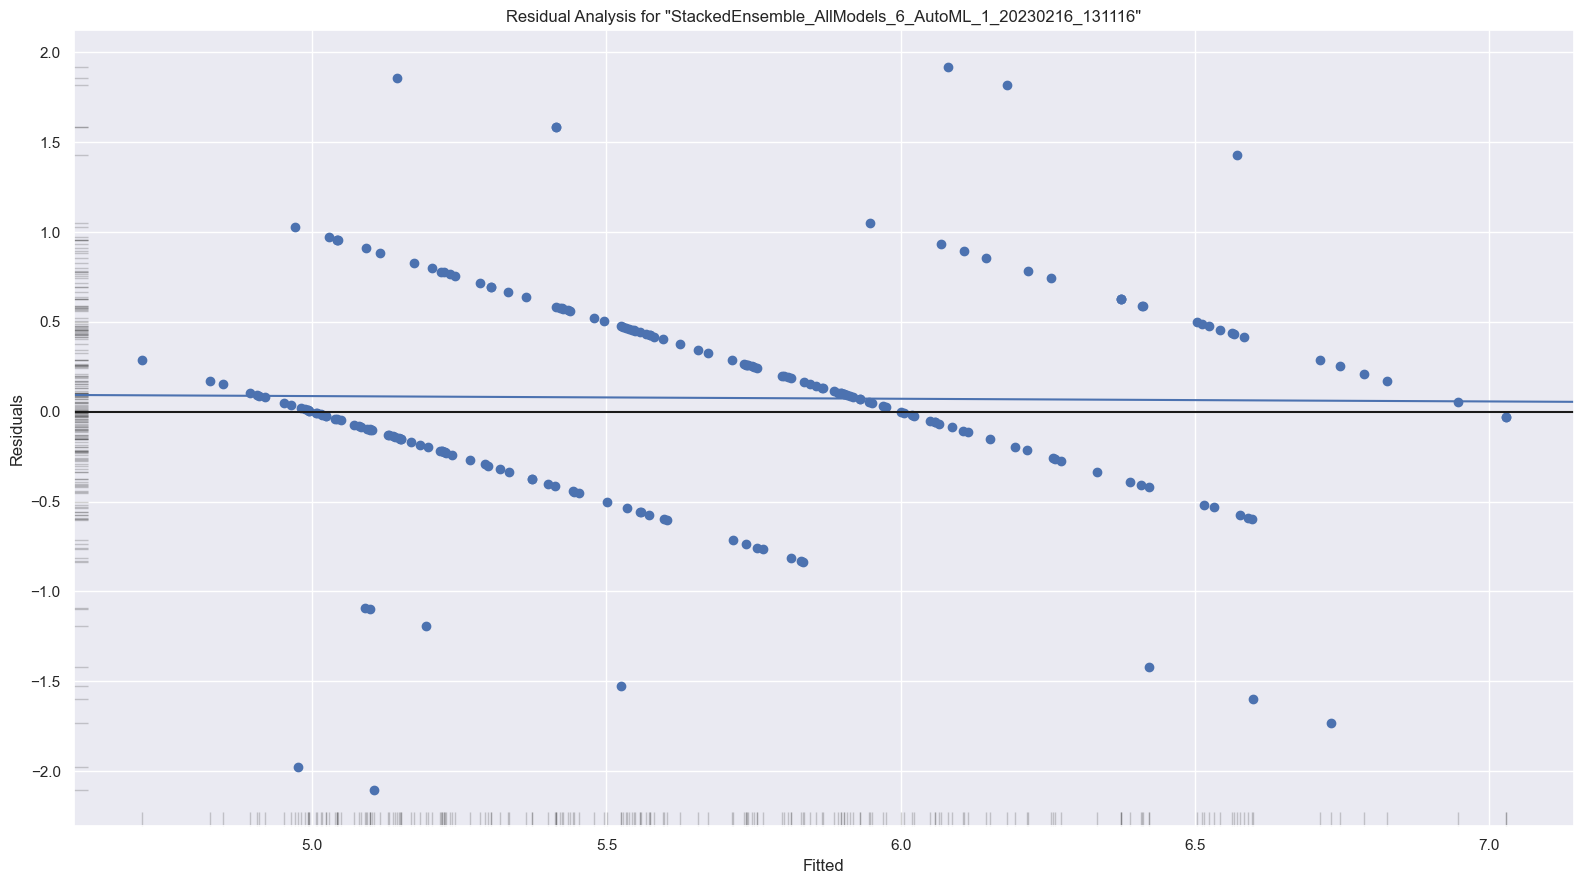

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

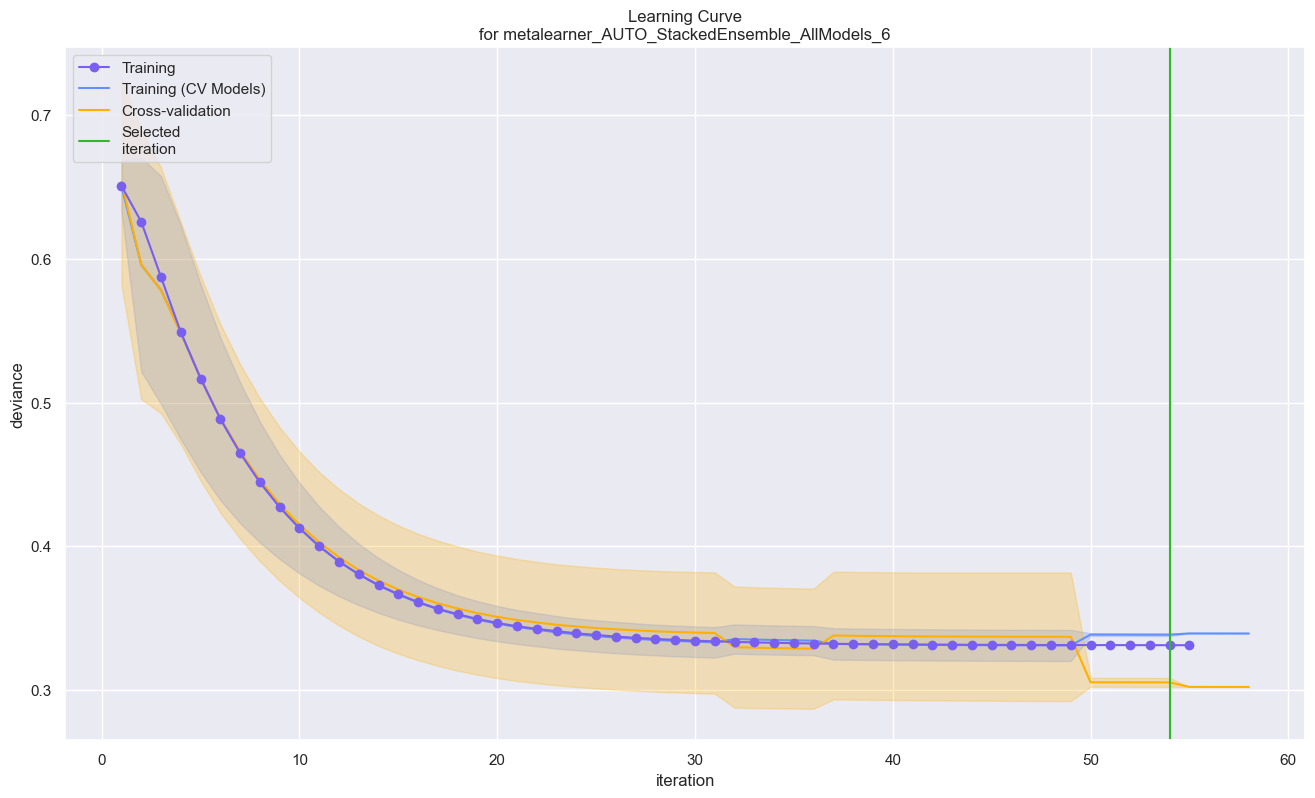

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

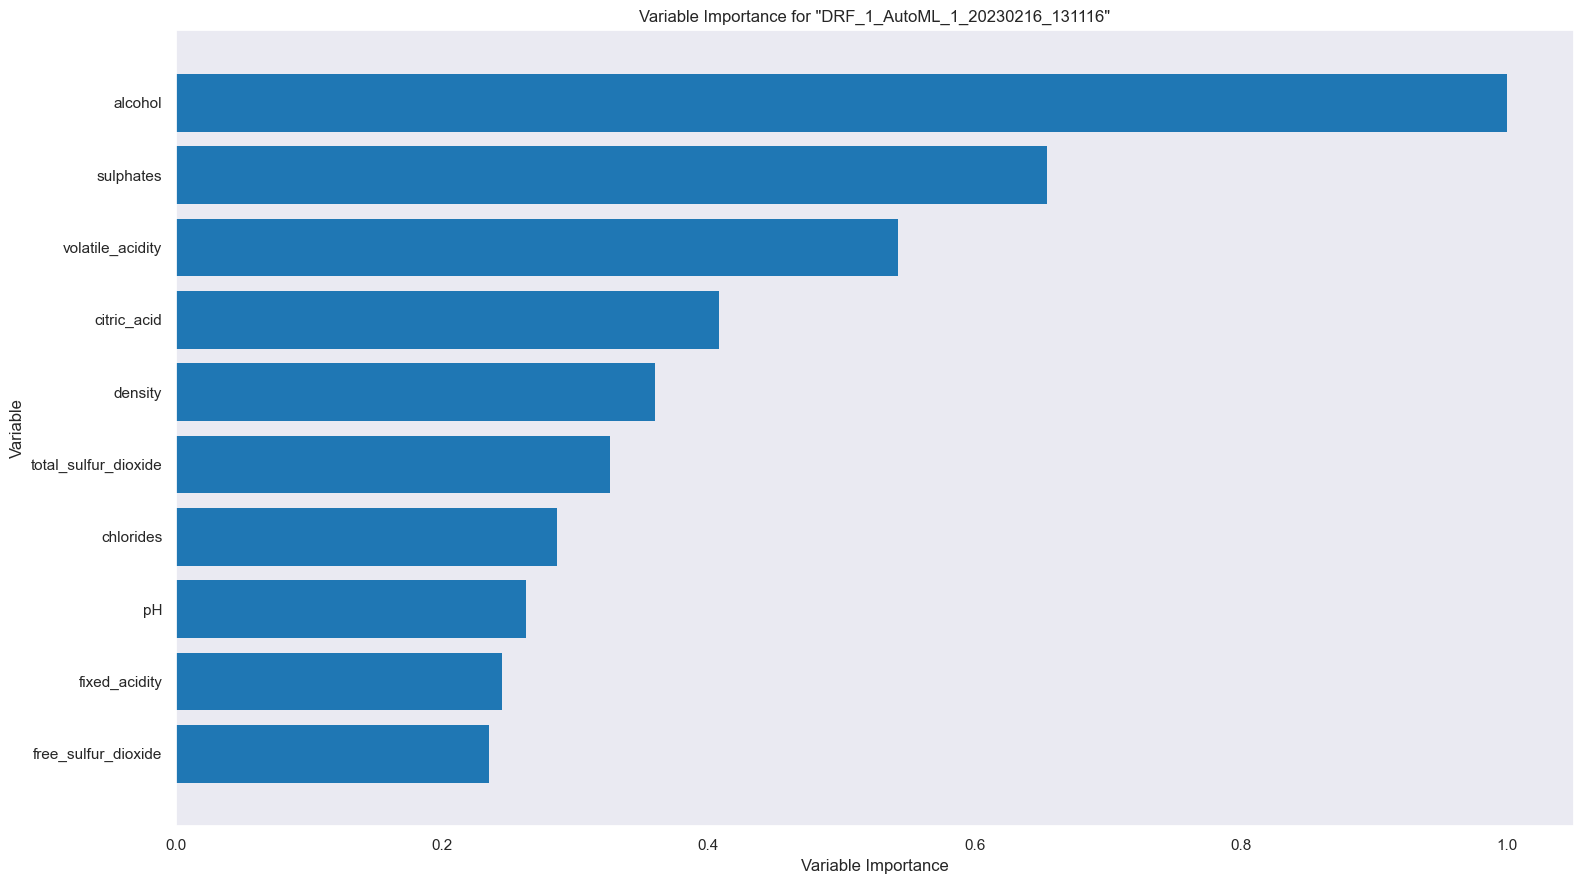

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

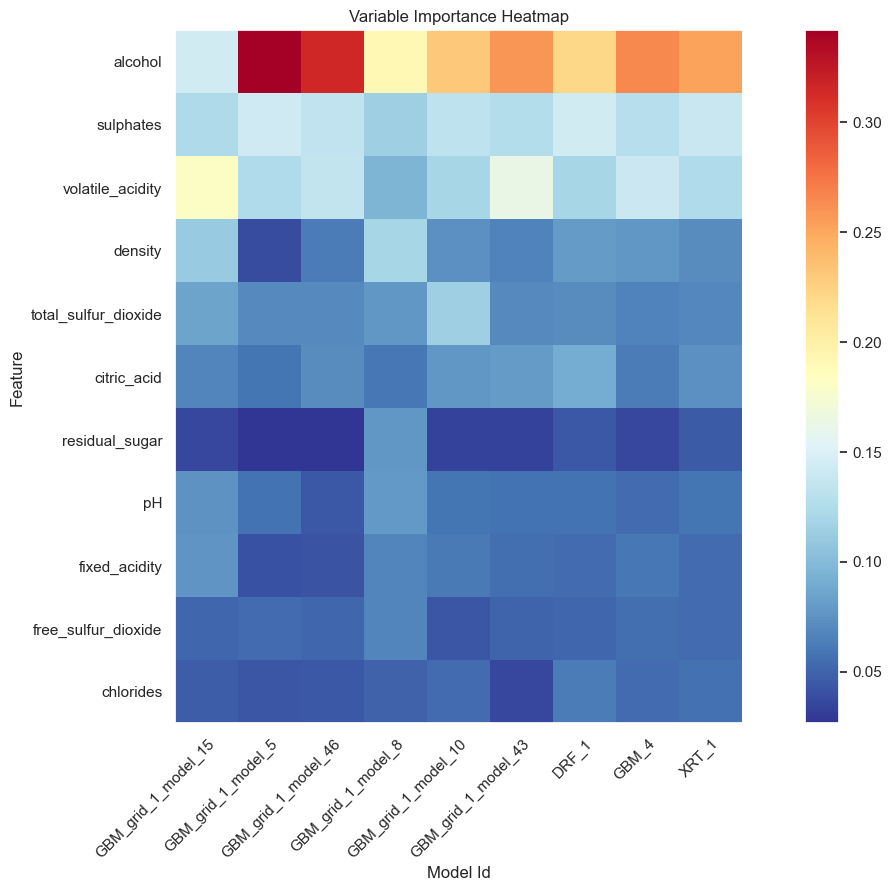

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

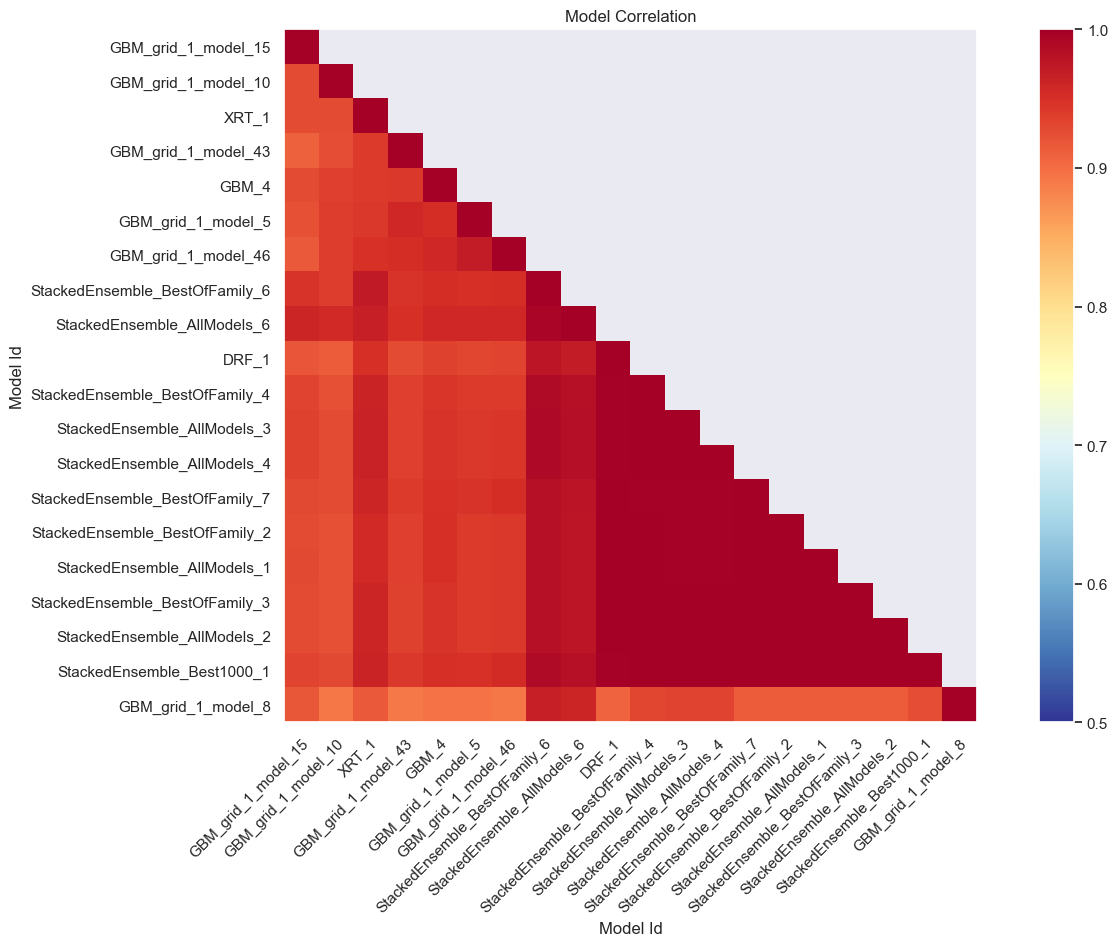

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

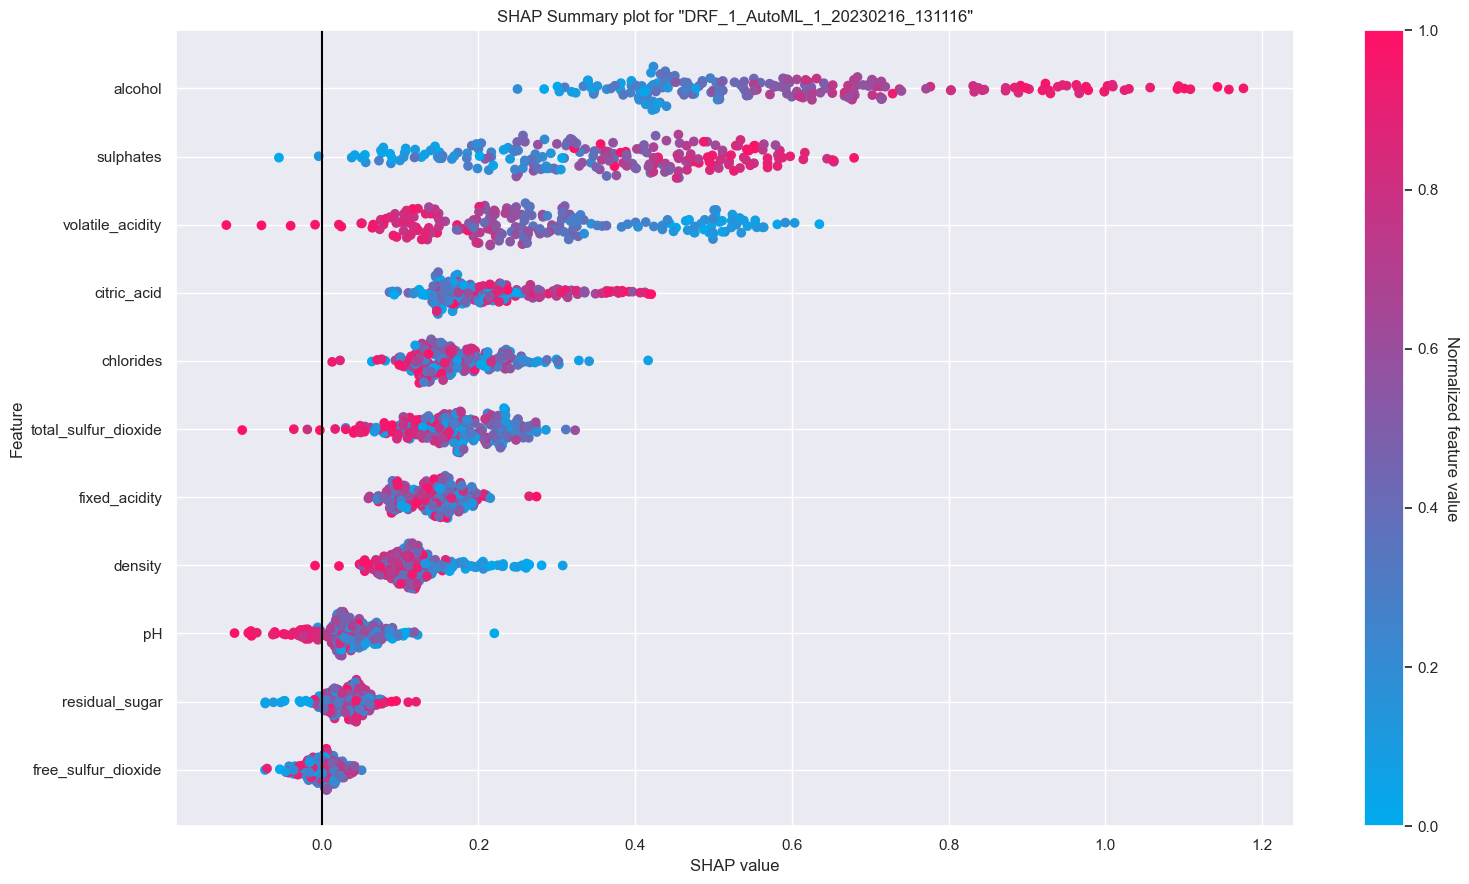

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

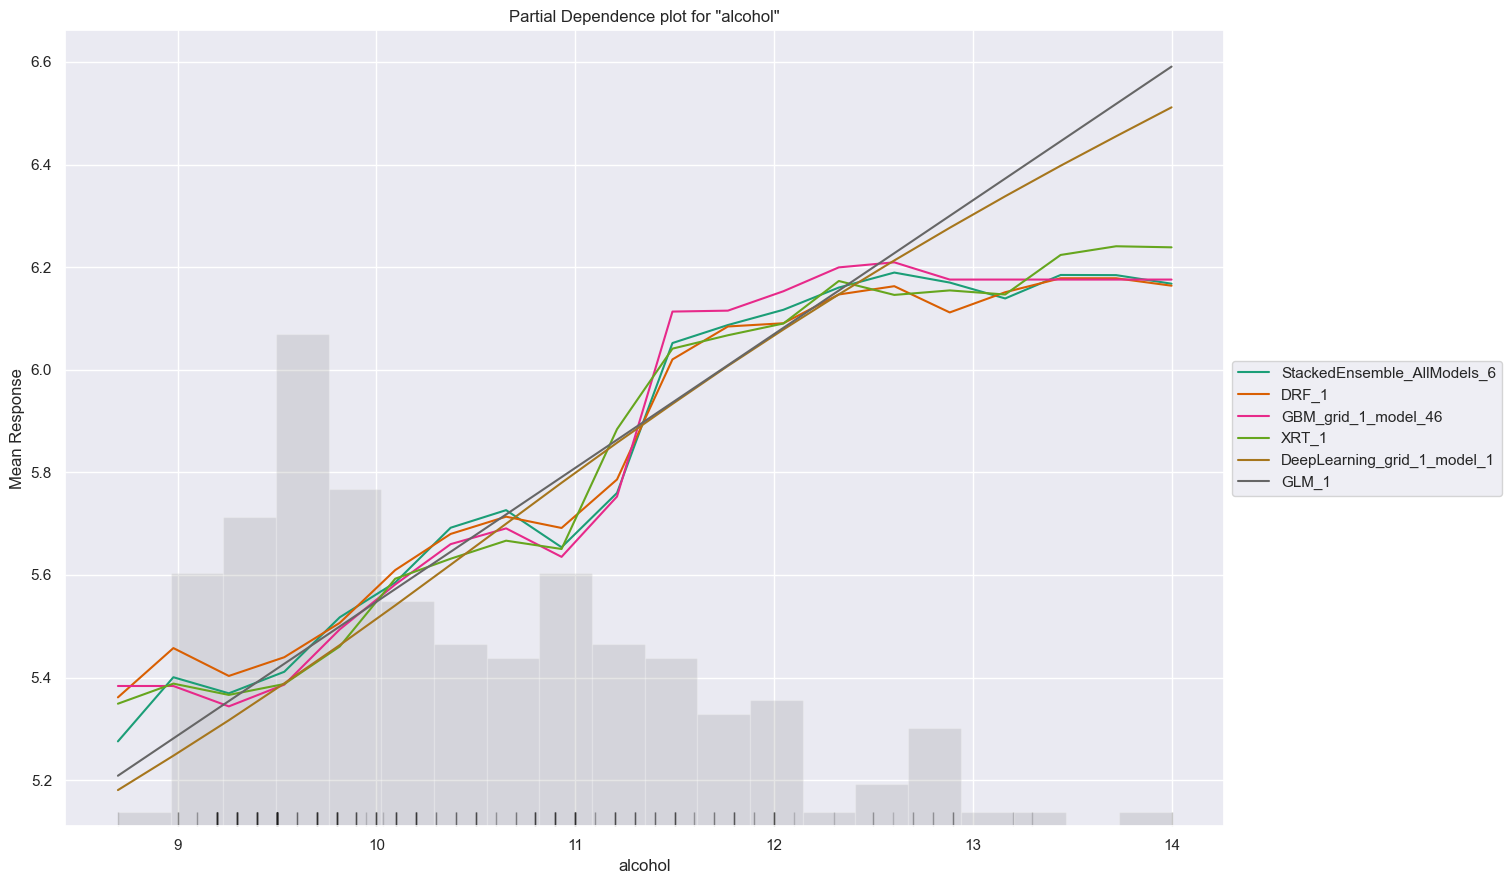

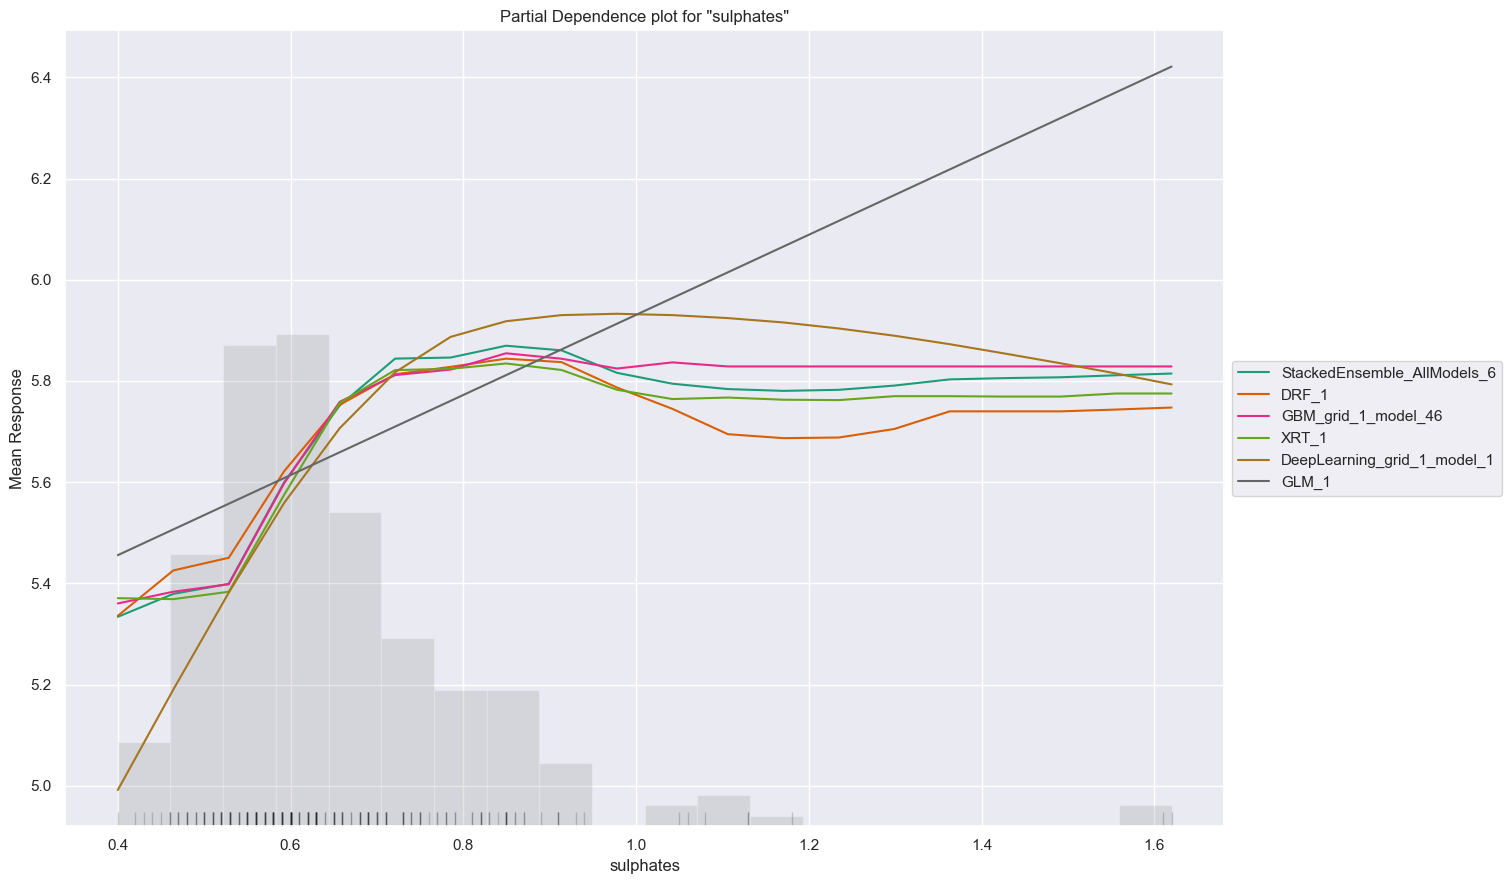

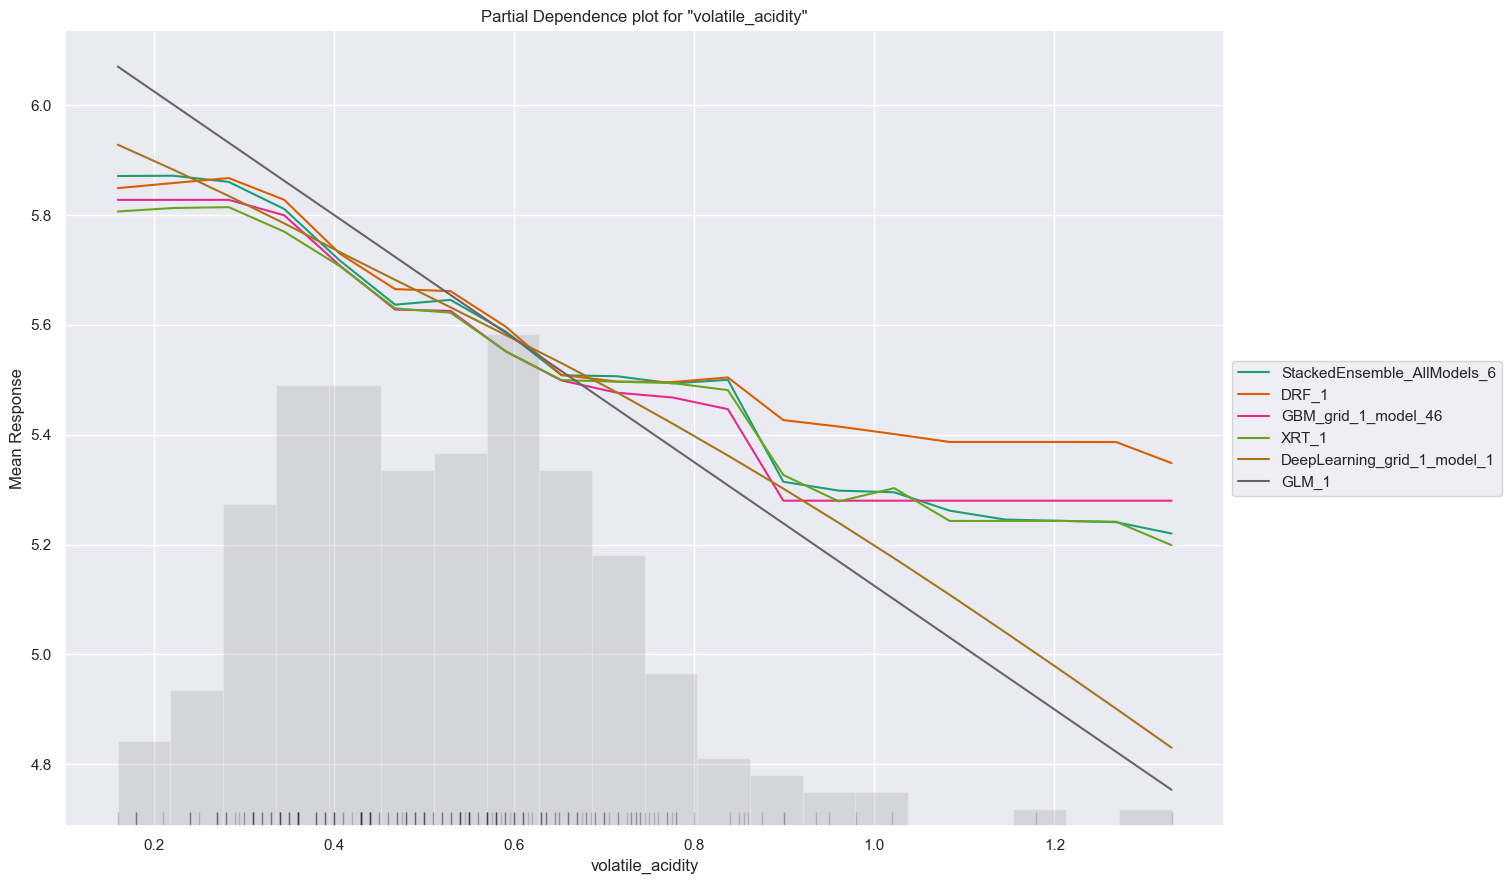

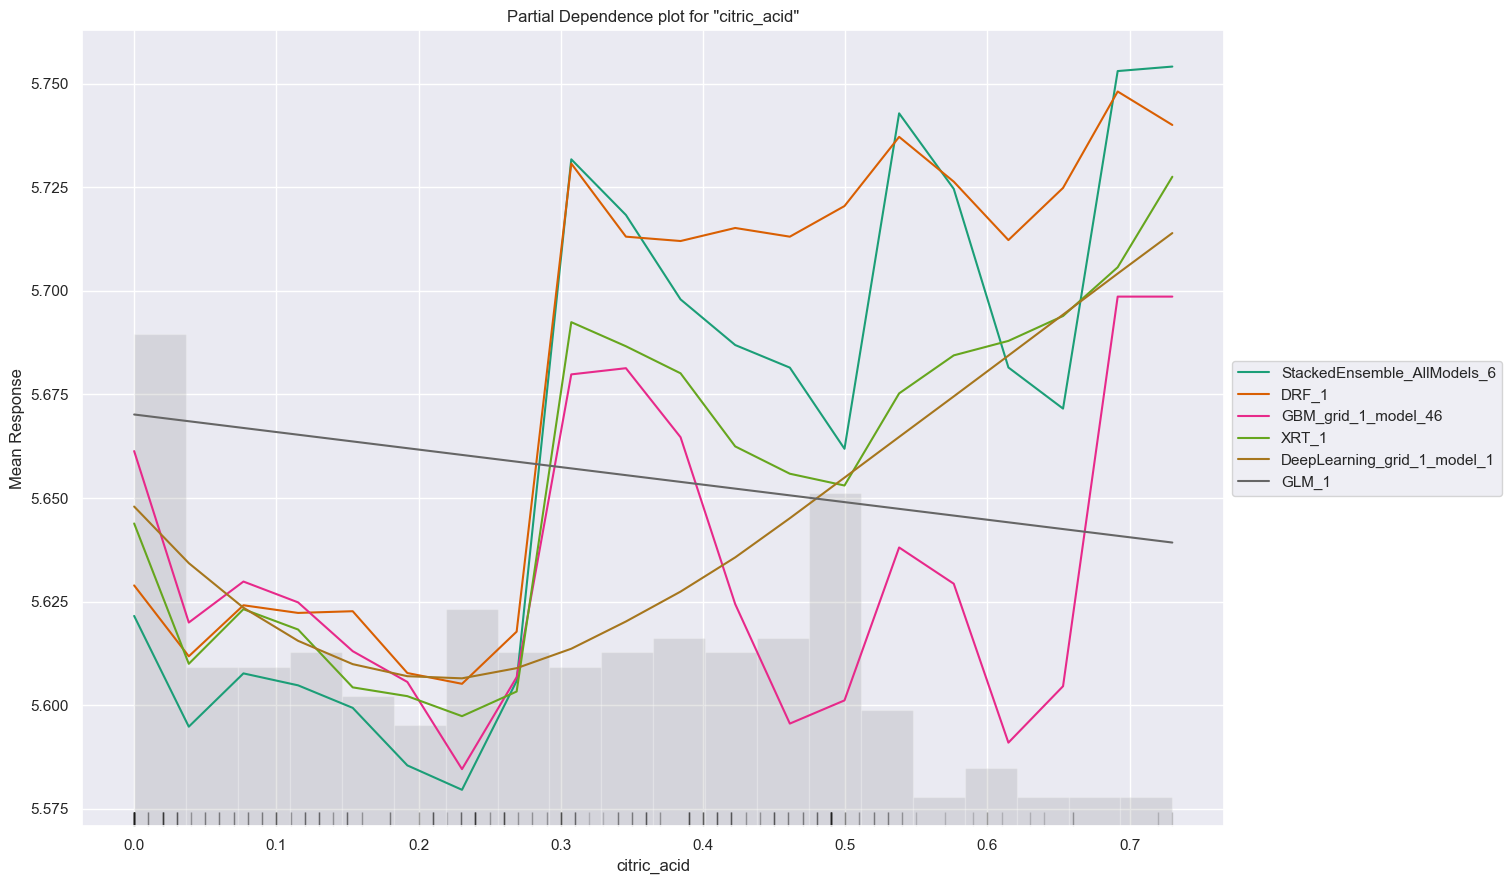

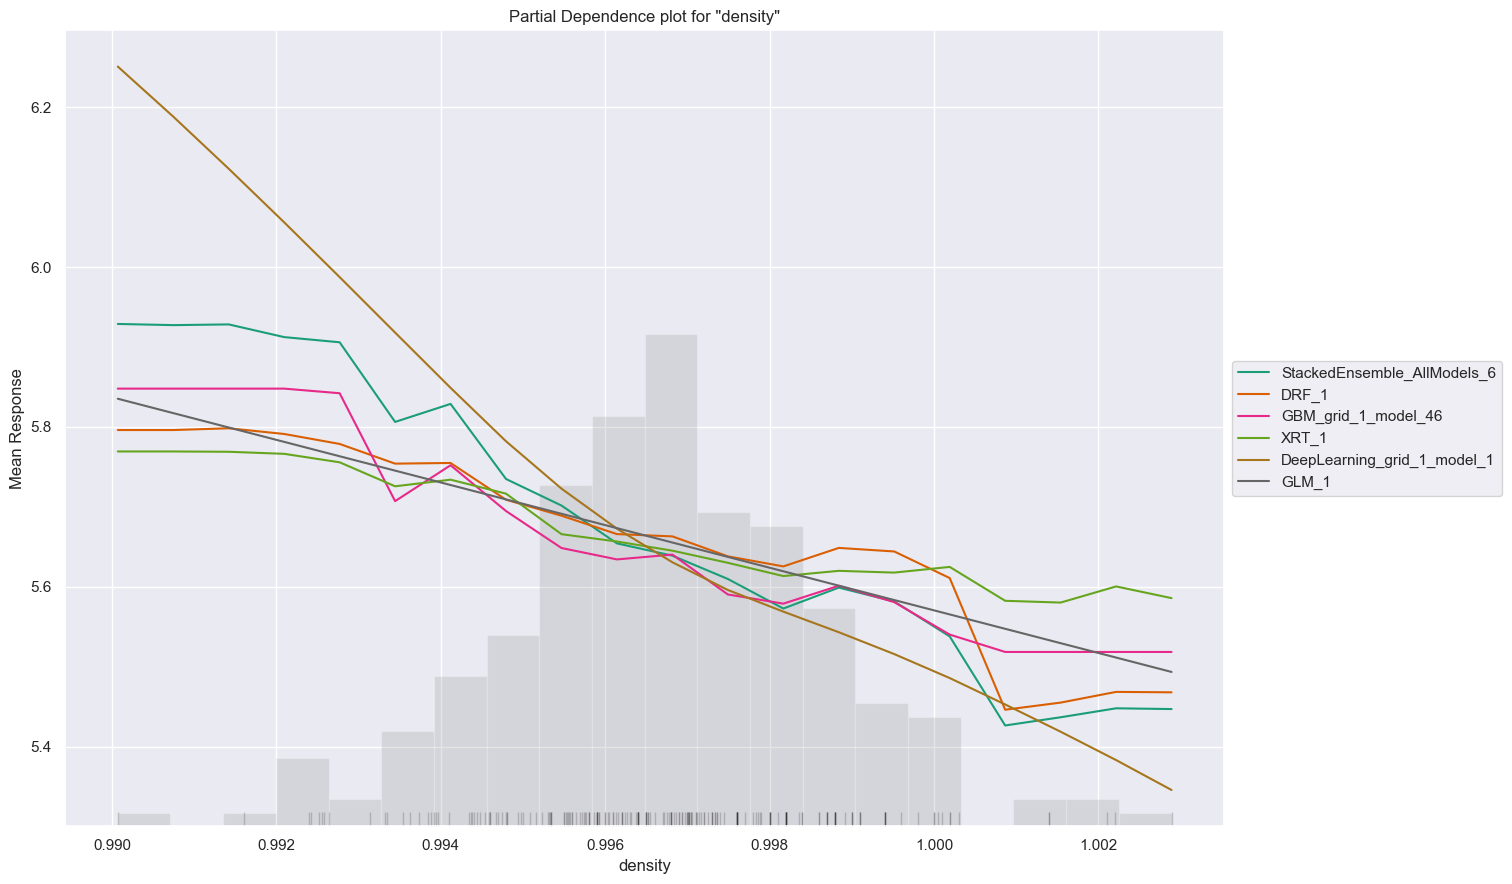

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

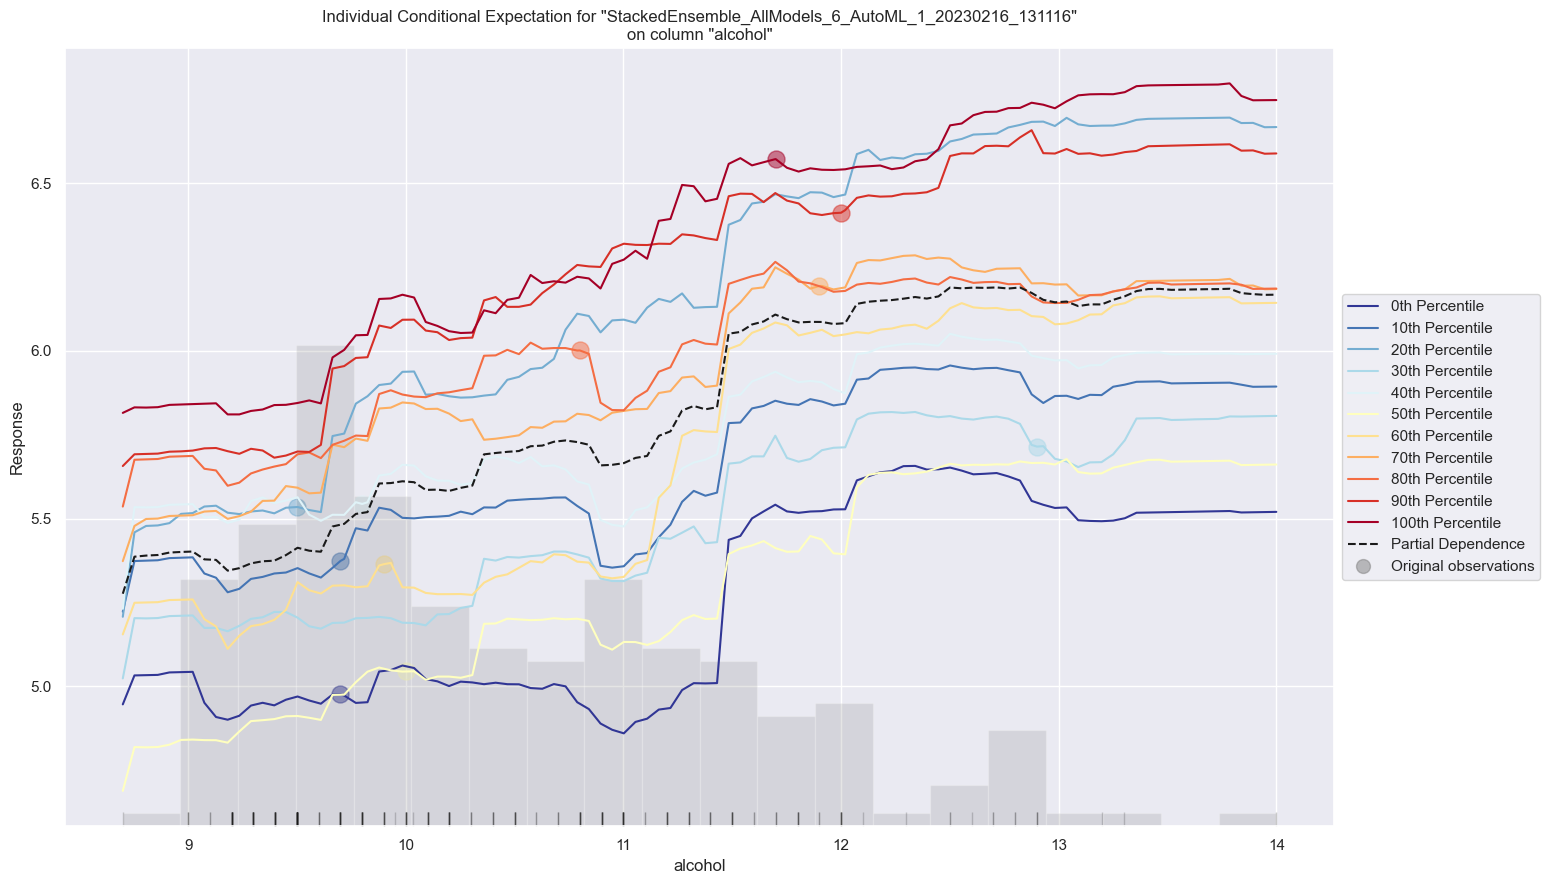

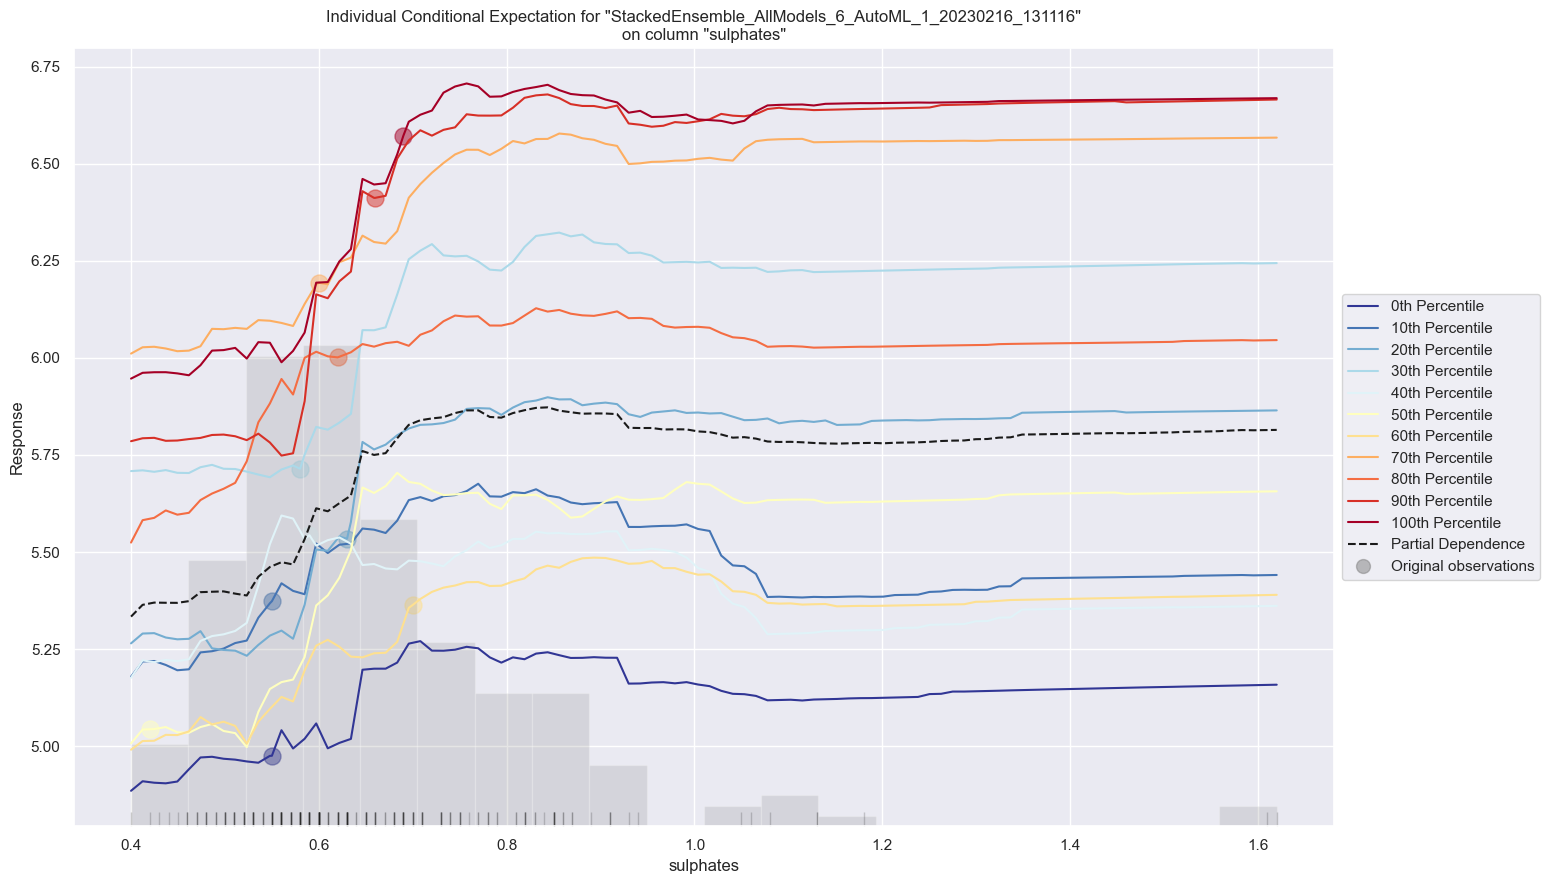

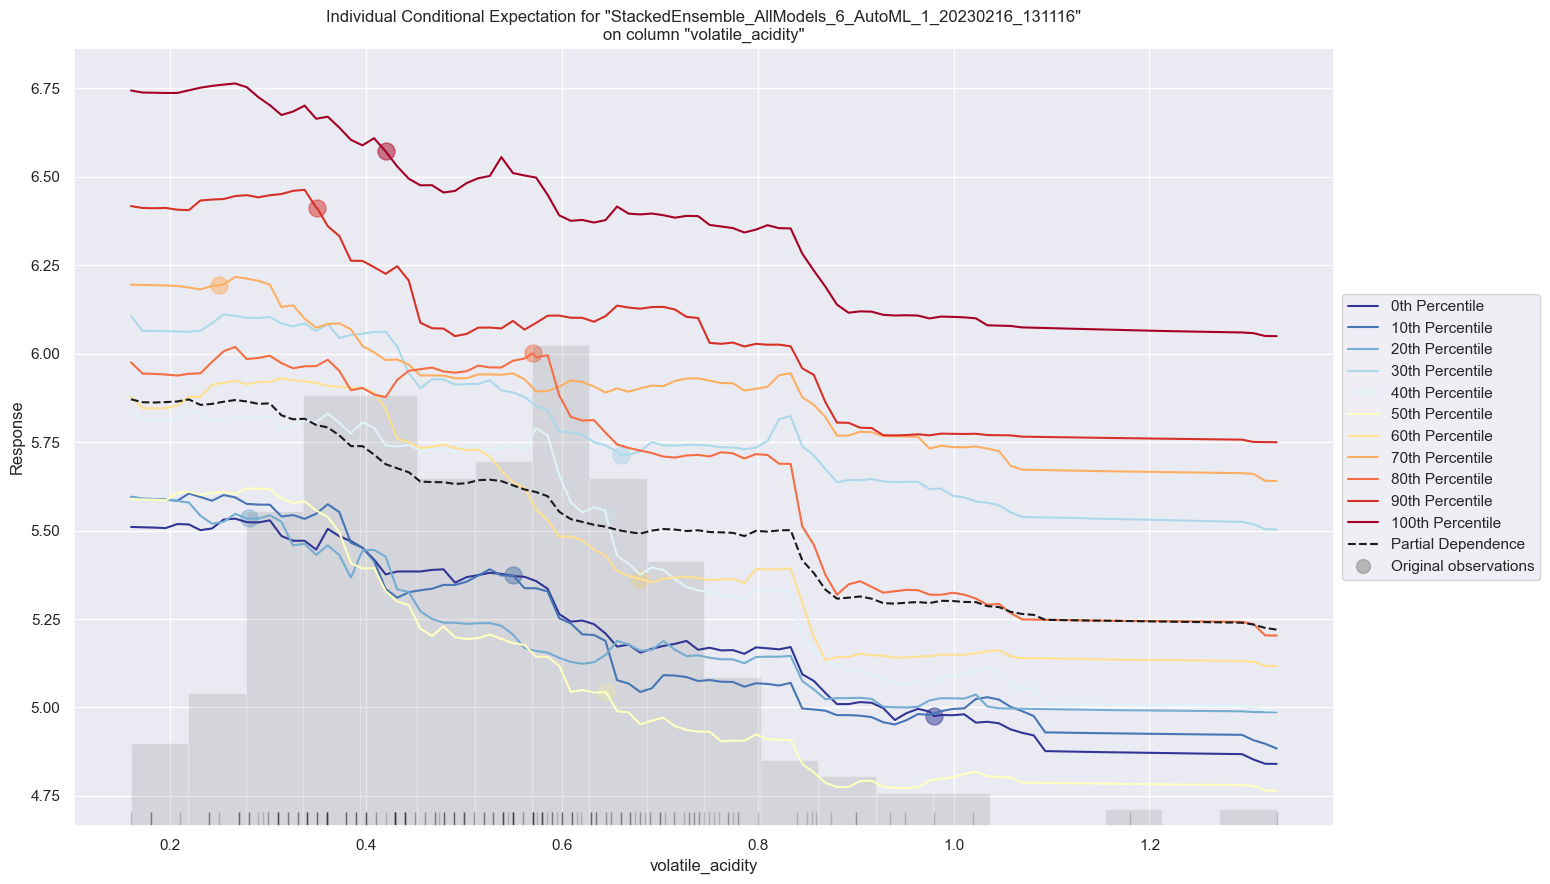

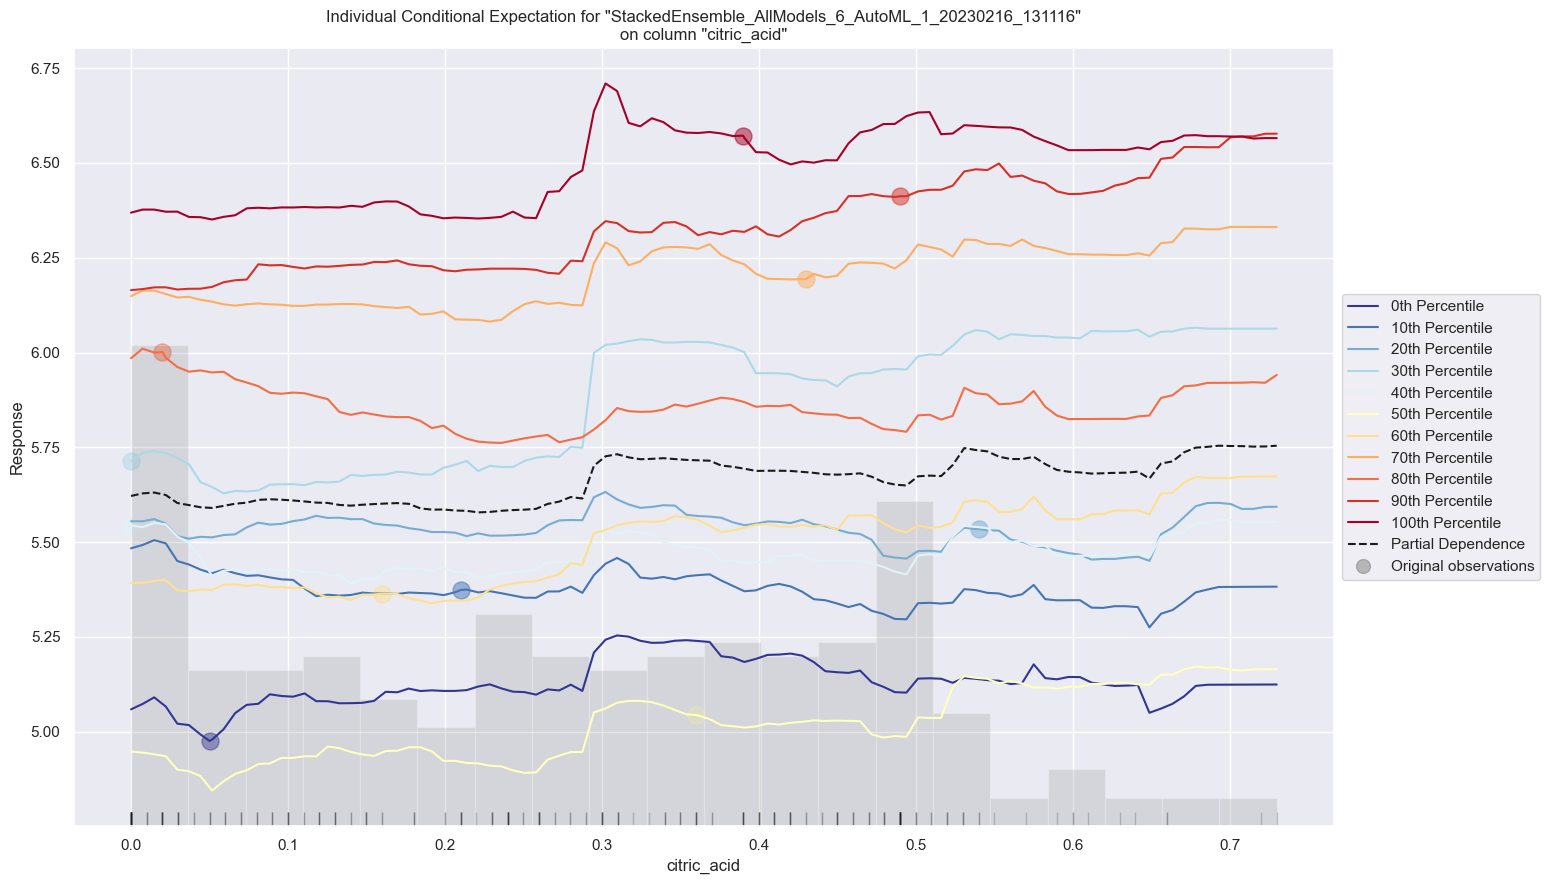

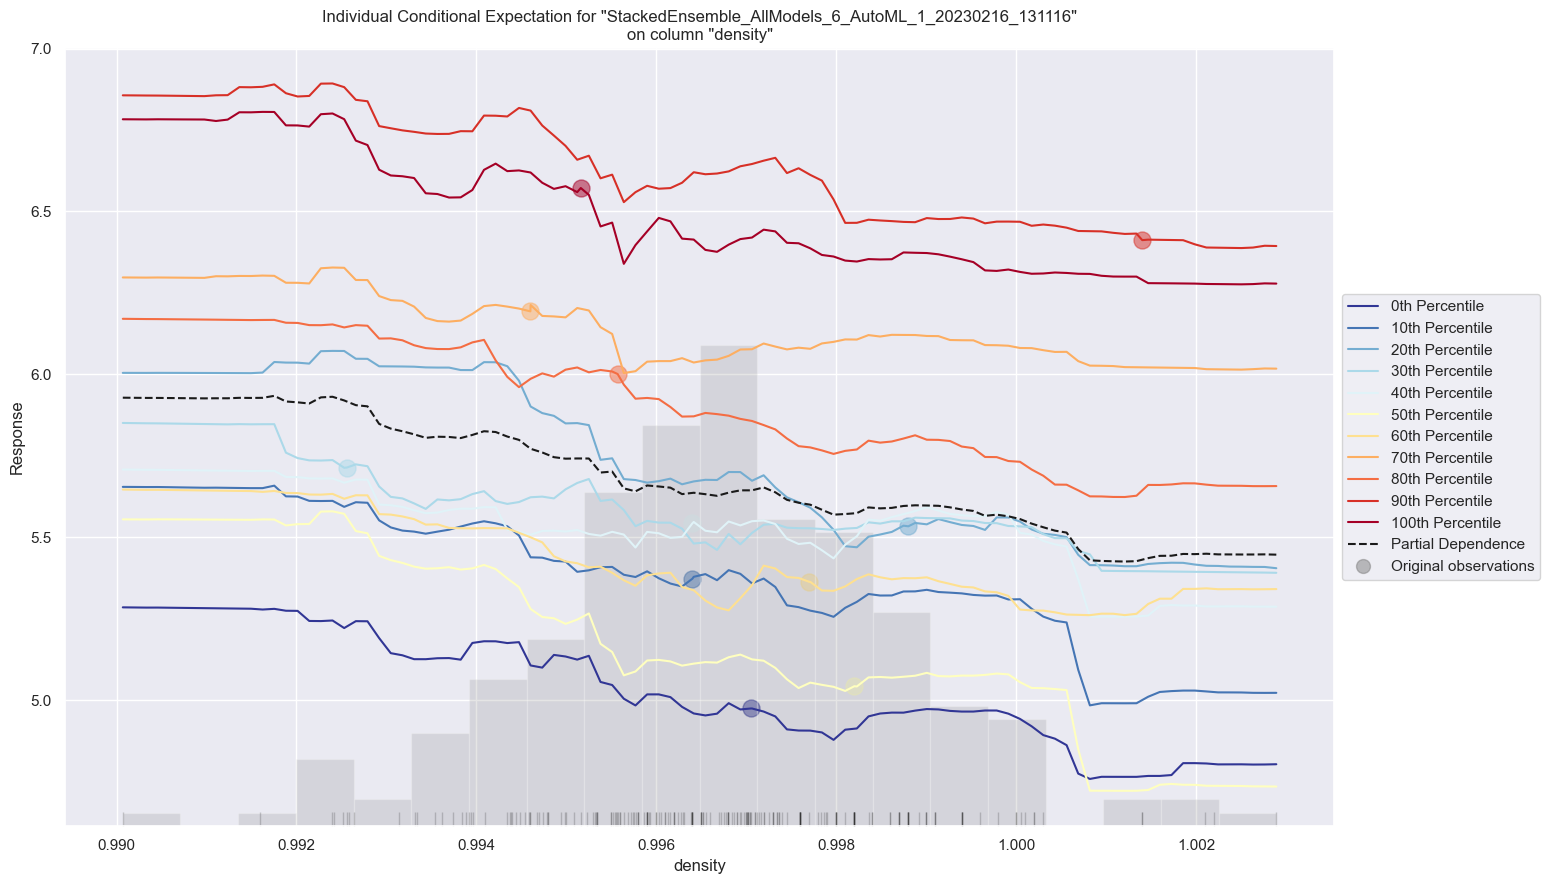

In [63]:
exa = aml.explain(df_test)

#Interpreting Best Model from AutoML

## Residual Analysis
- Here, we can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. It can also be observed from the below graph that residuals are normally distributed. Residuals signify that residuals don't have heteroscedasticity.


## SHAP Summary
From the SHAP summary diagram, we can interpret a few conclusions - 

1.   All the features are listed as per their importance in making the prediction, that is alcohol is more significant followed by volatile_acidity, and so on. Hence, free_sulphur_dioxide is the least significant predictor in our model.
2.   The position on the SHAP value axis indicates the impact the feature has on the prediction either positive or negative. That is, the more the data point is away from the 0.0 shap value - the more its impact is. As we can see Alcohol has the most impact on the quality of the wine. The color of the dot represents (Red - High, Blue - Low) the impact of the value on the result. i.e. - Hight amount of alcohol results in high quality of wine, a low amount of volatile acidity results in high quality of wine, and so on. As we can see the distribution of red points in the Alcohol feature is far more spread than the blue points. From this visual, we can interpret that the quality of wine vastly increases as the amount of alcohol increases. It doesn't have much impact if the content is low i.e. between the shap value of 0.4 to 0.6 the blue data points are pretty concentrated. Inversely for the Volatile Acidity, less is better for the quality of the wine. Let us analyze the distribution of SHAP values of this feature. As seen in the SHAP plot we can see that extreme values on both ends can have a significant effect on the quality of the wine. 


The advantage of SHAP analysis over normal feature importance is that we could visualize how the feature is affecting the target at different values. The standard methods tend to overestimate the importance of continuous or high-cardinality categorical variables.

## Partial Dependence Plot (PDP)

A partial dependence plot shows the marginal effect of a feature on the target(wine quality in our dataset). It is achieved by keeping all other variables constant and changing the value of one variable to get its PDP.

For Interpretation purposes, let us pick up the two most important variables - Alcohol and Sulphate. 

1.   As we can see that when the rest of the variables are kept constant and a 
marginal change is made in alcohol, we can see the mean response increases between alcohol levels of 11 and 12. This could be interpreted as this range of alcohol could be the deciding factor in the quality of the wine.
2.   Similarly when the rest of the variables are kept constant and a marginal change is made in sulfate we can observe the mean response of quality going up between the sulfate range of 0.4 to 0.8. Hence, it can be interpreted that this range is deciding factor in the quality of the wine. 

The computation of partial dependence plots is intuitive: The partial dependence function at a particular feature value represents the average prediction if we force all data points to assume that feature value.

## ICE (Individual Conditional Expectation) Plot

ICE plot is similar to what we did in the PDP plot, but the fundamental difference between the two methods is that the PDP plot focuses on the average effect of a feature and does not focus on a specific instance. ICE plot comes in rescue to address this drawback of the PDP plot where the outputs from all instances are considered instead of an average value. 

Let us go back to the alcohol and sulfate features, as we interpreted in PDP the quality of wine increases when alcohol and sulfate value is between 11 to 12 and 0.4 to 0.8 respectively. But is this true for every wine in the dataset? ICE plot has an answer to this question. As we can see in the ICE plot above the quality of a few wines(0th percentile instance) increases a lot in this range while the quality of a few doesn't change much(100th Percentile Instance). 

Individual conditional expectation curves are even more intuitive to understand than partial dependence plots. One line represents the predictions for one instance if we vary the feature of interest.


In [64]:
import statsmodels.formula.api as smf  # OLS model Library

In [65]:
import h2o

pandas_df = h2o.as_list(df)

In [66]:
results = smf.ols(
    "quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide +density + pH + sulphates + alcohol",
    data=pandas_df,
).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     61.49
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          4.26e-107
Time:                        13:16:09   Log-Likelihood:                -1106.7
No. Observations:                1143   AIC:                             2237.
Df Residuals:                    1131   BIC:                             2298.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               21.5495     24.773      0.870      0.385     -27.057      70.156
fixed_acidity            0.0230      0.030      0.759      0.448      -0.036       0.082
volatile_acidity        -1.1291      0.141     -8.023      0.000      -1.405      -0.853
citric_acid             -0.1319      0.173     -0.762      0.446      -0.471       0.208
residual_sugar           0.0135      0.018      0.732      0.464      -0.023       0.050
chlorides               -1.7082      0.497     -3.434      0.001      -2.684      -0.732
free_sulfur_dioxide      0.0024      0.003      0.928      0.354      -0.003       0.007
total_sulfur_dioxide    -0.0028      0.001     -3.321      0.001      -0.004      -0.001
density                -17.4493     25.286     -0.690      0.490     -67.062      32.163
pH                      -0.4082      0.223     -1.832      0.067      -0.845       0.029
sulphates                0.8752      0.134      6.555      0.000       0.613       1.137
alcohol                  0.2801      0.031      8.963      0.000       0.219       0.341
==============================================================================
Omnibus:                       19.010   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.205
Skew:                          -0.141   Prob(JB):                     4.55e-07
Kurtosis:                       3.731   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Assumptions

- Here, we can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. Here no heteroscadasticity is observed in the residual plot, hence this assumption is not violated.
- Here the Durbin- Watson value is 1.780, which signifies that there is no autocorrelation in our data, hence this assumption is also not violated.

# Interpreting Regression Co-efficients
**Model Co-efficients**

The positive or negative value of a co-eficient tells us if there is a positve or a negtive correlationship between the target and predictors. A positive value indicates that the value of target *increases* if the value of co-efficient *increases* and vice-versa. Whereas the negative values indicates that the value of target *increases* if the value of co-efficient *decreases* and vice versa.

High absolute values of co-efficients can be used to get an idea of the importance of variables in a linear regression. Here, as stated above Alcohol and Sulphates seems to be the most important variables to predict target i.e. Quality of Wine. 

Also, it signifies that Higher the qualtity of Alcohol and sulphates - better is the quality of Wine.

**P-Values**

If the p-value is 0.05 or lower, the result is trumpeted as significant, but if it is higher than 0.05, the result is non-significant
- volatile_acidity
- chlorides
- total_sulfur_dioxide
- alcohol
- sulphate

These variables have P-Value less that 0.05, hence it can be interpreted that these variables are significant variables and any change to this variables have significant impact on the target (Wine Quality).

**Skew and Kurtosis**

Skewness tells us the amount and direction of skew(Departure from the central axis) and Kurtosis tells us how tall and sharp the central peak is. The optimum value for these two measures is 0, in our case we have a value for Skew and Kurtosis as -0.143, 3.717 respectively.

**Durbin-Watson**

The Durbin-Watson test is a statistical test to detect auto-correlation in the residuals of a regression analysis. Its range is 0 to 4.
- Value of 2 indicates that no auto correlation is detected
- Value between 0 to 2 indicates that there is positive auto correlation detected
- Value between 2 to 4 indicates that there is negatibe auto correlation detected

Our model has a DW score of 1.780 which could be interpreted as a positive auto-correlation in the residuals of regression. 

**Jarque-Bera Test**

The JB test is known as the test of Normality, irrespective if the data has skew or kurtosis. If it is far from zero, it signals the data do not have a normal distribution. Our JB value is 28.421 which again re-inforces the interpretation we got from Skew and Kurtosis. 

Hyperparameter Tuning - Random Grid Search on GBM Model

In [67]:
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [68]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [69]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [70]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [71]:
gbm_grid2.train(
    x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.30000000000000004  0.03          8.0          1.0                 gbm_grid2_model_5   0.35480524385153644
     0.7000000000000001   0.03          6.0          1.0                 gbm_grid2_model_6   0.36011221077943606
     0.9                  0.03          10.0         0.5                 gbm_grid2_model_21  0.36263107258575494
     0.8                  0.03          9.0          0.9                 gbm_grid2_model_8   0.364344908122557
     0.7000000000000001   0.06          5.0          0.6000000000000001  gbm_grid2_model_14  0.3674971212149845
     0.9                  0.1           4.0          0.7000000000000001  gbm_grid2_model_15  0.3683606689384931
     0.1                  0.06          8.0          0.9                 gbm_grid2_model_34  0.3724886123948998
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   0.37428340832001145
     0.9                  0.04          4.0          0.9                 gbm_grid2_model_31  0.37433509827005
     0.5                  0.05          7.0          0.9                 gbm_grid2_model_2   0.37435311278041256
---  ---                  ---           ---          ---                 ---                 ---
     0.8                  0.04          2.0          0.9                 gbm_grid2_model_4   0.39677168032632376
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.3998045691918407
     0.5                  0.03          2.0          0.6000000000000001  gbm_grid2_model_26  0.40472110583139626
     0.5                  0.01          10.0         1.0                 gbm_grid2_model_24  0.4052656282885272
     0.1                  0.02          9.0          0.8                 gbm_grid2_model_16  0.40594347949213744
     0.6000000000000001   0.01          9.0          0.8                 gbm_grid2_model_11  0.4085508526510817
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  0.4313489971526621
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  0.434999581935655
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  0.4801953025626885
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.4814276437379456
[36 rows x 7 columns]

In [72]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)

In [73]:
gbm_gridperf2

Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.30000000000000004  0.03          8.0          1.0                 gbm_grid2_model_5   0.35480524385153644
     0.7000000000000001   0.03          6.0          1.0                 gbm_grid2_model_6   0.36011221077943606
     0.9                  0.03          10.0         0.5                 gbm_grid2_model_21  0.36263107258575494
     0.8                  0.03          9.0          0.9                 gbm_grid2_model_8   0.364344908122557
     0.7000000000000001   0.06          5.0          0.6000000000000001  gbm_grid2_model_14  0.3674971212149845
     0.9                  0.1           4.0          0.7000000000000001  gbm_grid2_model_15  0.3683606689384931
     0.1                  0.06          8.0          0.9                 gbm_grid2_model_34  0.3724886123948998
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   0.37428340832001145
     0.9                  0.04          4.0          0.9                 gbm_grid2_model_31  0.37433509827005
     0.5                  0.05          7.0          0.9                 gbm_grid2_model_2   0.37435311278041256
---  ---                  ---           ---          ---                 ---                 ---
     0.8                  0.04          2.0          0.9                 gbm_grid2_model_4   0.39677168032632376
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.3998045691918407
     0.5                  0.03          2.0          0.6000000000000001  gbm_grid2_model_26  0.40472110583139626
     0.5                  0.01          10.0         1.0                 gbm_grid2_model_24  0.4052656282885272
     0.1                  0.02          9.0          0.8                 gbm_grid2_model_16  0.40594347949213744
     0.6000000000000001   0.01          9.0          0.8                 gbm_grid2_model_11  0.4085508526510817
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  0.4313489971526621
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  0.434999581935655
     1.0                  0.01          2.0          0.5                 gbm_grid2_model_23  0.4801953025626885
     1.0                  0.01          2.0          0.7000000000000001  gbm_grid2_model_10  0.4814276437379456
[36 rows x 7 columns]

In [74]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [75]:
models = gbm_gridperf2.models

In [76]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [77]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [78]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [79]:
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.3        0.03          8          1.0           0.354805
1               0.7        0.03          6          1.0           0.360112
2               0.9        0.03         10          0.5           0.362631
3               0.8        0.03          9          0.9           0.364345
4               0.7        0.06          5          0.6           0.367497
5               0.9        0.10          4          0.7           0.368361
6               0.1        0.06          8          0.9           0.372489
7               0.5        0.10          9          1.0           0.374283
8               0.9        0.04          4          0.9           0.374335
9               0.5        0.05          7          0.9           0.374353
10              0.2        0.04          5          0.9           0.375424
11              0.9        0.09          8          0.9           0.375609
12              0.8      

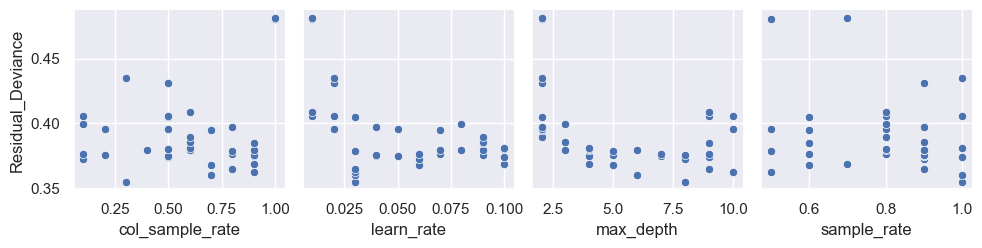

In [80]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

# Hyperparameter Tuning Analysis

- This is a summary of hyperparameter tuning for an XGBoost model, which involved a grid search over a range of values for four hyperparameters: col_sample_rate, learn_rate, max_depth, and sample_rate. The search resulted in a total of 36 combinations of hyperparameters, and for each combination, the Residual Deviance was calculated as an evaluation metric.

- Based on the results, the hyperparameter combination with the lowest Residual Deviance was a model with col_sample_rate of 0.3, learn_rate of 0.03, max_depth of 8, and sample_rate of 1.0, with a Residual Deviance of 0.354805. The next best models had Residual Deviances in the range of 0.36-0.39, while the worst-performing models had Residual Deviances above 0.43.

- Overall, the results suggest that the combination of col_sample_rate, learn_rate, max_depth, and sample_rate can have a significant impact on the performance of an XGBoost model, and that hyperparameter tuning can lead to significant improvements in model performance.


Conclusion 
- Built a predictive model using H2O AutoML to predict the quality of wine using certain attributes.                                                  
- Studied the effects of Ridge and LASSO regularization on the GLM Model.
- Studied the importance of variable using SHAP summary.
- Performed the hyperparameterb tuning using Random Grid Search Method. 

References
- https://rstudio-pubs-static.s3.amazonaws.com/64286_2635bf8b05fb4423ac2968243211b46b.html
- https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html
- https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e

MIT License

Copyright (c) 2022 Karan Raman Agrawal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.